<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_1351-1400.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6007]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [6008]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

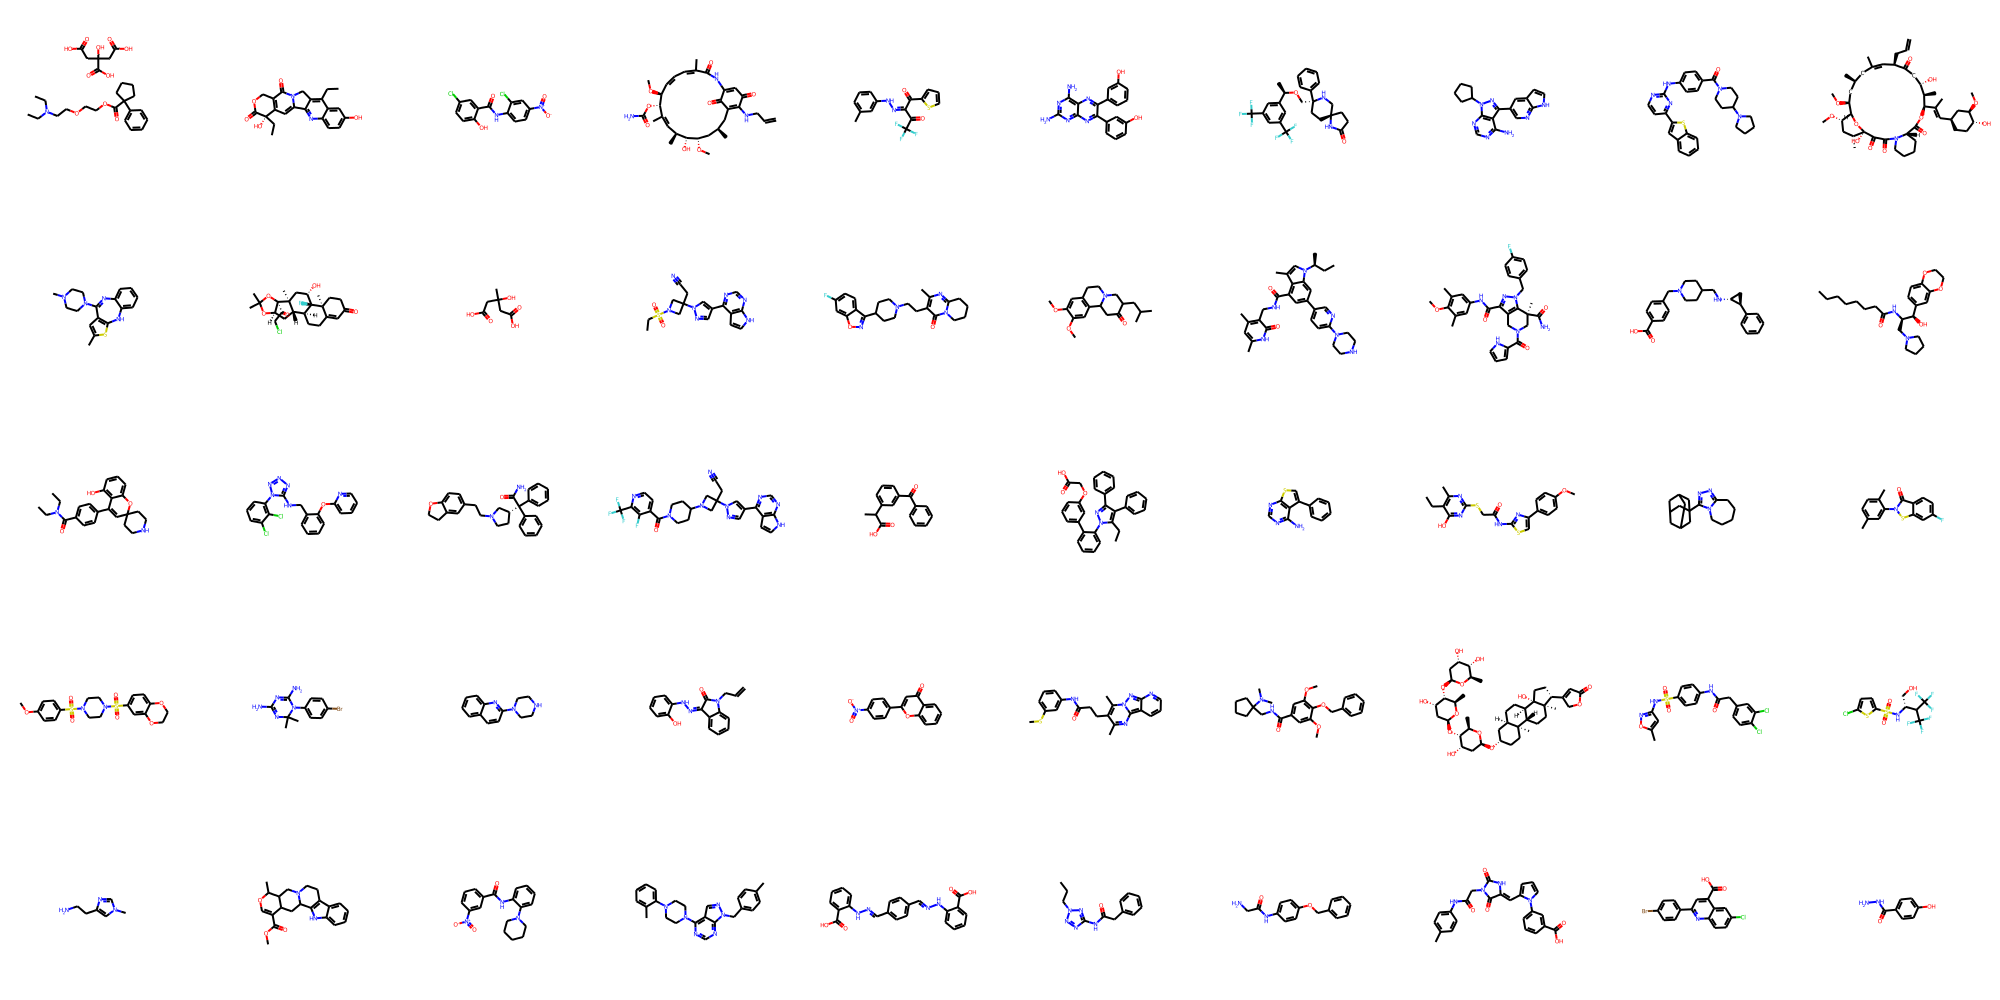

In [6009]:
smiles_list = [
'CCN(CC)CCOCCOC(=O)C1(c2ccccc2)CCCC1.O=C(O)CC(O)(CC(=O)O)C(=O)O',
'CCc1c2c(nc3ccc(O)cc13)-c1cc3c(c(=O)n1C2)COC(=O)[C@]3(O)CC',
'O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O',
'C=CCNC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C)/C=C(\C)[C@H](OC(N)=O)[C@@H](OC)/C=C\C=C(/C)C(=O)NC(=CC1=O)C2=O',
'Cc1cccc(N/N=C(\C(=O)c2cccs2)C(=O)C(F)(F)F)c1',
'Nc1nc(N)c2nc(-c3cccc(O)c3)c(-c3cccc(O)c3)nc2n1',
'C[C@@H](OC[C@@]1(c2ccccc2)CC[C@]2(CCC(=O)N2)CN1)c1cc(C(F)(F)F)cc(C(F)(F)F)c1',
'Nc1ncnc2c1c(-c1cnc3[nH]ccc3c1)nn2C1CCCC1',
'O=C(c1ccc(Nc2nccc(-c3cc4ccccc4s3)n2)cc1)N1CCC(N2CCCC2)CC1',
'C=CC[C@@H]1/C=C(\C)C[C@H](C)C[C@H](OC)[C@H]2O[C@@](O)(C(=O)C(=O)N3CCCC[C@H]3C(=O)O[C@H](/C(C)=C/[C@@H]3CC[C@@H](O)[C@H](OC)C3)[C@H](C)[C@@H](O)CC1=O)[C@H](C)C[C@@H]2OC',
'Cc1cc2c(s1)Nc1ccccc1N=C2N1CCN(C)CC1',
'CC1(C)O[C@@H]2C[C@H]3[C@@H]4CCC5=CC(=O)CC[C@]5(C)[C@@]4(F)[C@@H](O)C[C@]3(C)[C@]2(C(=O)CCl)O1',
'CC(O)(CC(=O)O)CC(=O)O',
'CCS(=O)(=O)N1CC(CC#N)(n2cc(-c3ncnc4[nH]ccc34)cn2)C1',
'Cc1nc2n(c(=O)c1CCN1CCC(c3noc4cc(F)ccc34)CC1)CCCC2',
'COc1cc2c(cc1OC)C1CC(=O)C(CC(C)C)CN1CC2',
'CC[C@H](C)n1cc(C)c2c(C(=O)NCc3c(C)cc(C)[nH]c3=O)cc(-c3ccc(N4CCNCC4)nc3)cc21',
'COc1c(C)cc(NC(=O)c2nn(Cc3ccc(F)cc3)c3c2CN(C(=O)c2ccc[nH]2)C[C@]3(C)C(N)=O)cc1C',
'O=C(O)c1ccc(CN2CCC(CN[C@@H]3C[C@H]3c3ccccc3)CC2)cc1',
'CCCCCCCC(=O)N[C@H](CN1CCCC1)[C@H](O)c1ccc2c(c1)OCCO2',
'CCN(CC)C(=O)c1ccc(C2=CC3(CCNCC3)Oc3cccc(O)c32)cc1',
'Clc1cccc(-n2nnnc2NCc2ccccc2Oc2ccccn2)c1Cl',
'NC(=O)C(c1ccccc1)(c1ccccc1)[C@@H]1CCN(CCc2ccc3c(c2)CCO3)C1',
'N#CCC1(n2cc(-c3ncnc4[nH]ccc34)cn2)CN(C2CCN(C(=O)c3ccnc(C(F)(F)F)c3F)CC2)C1',
'CC(C(=O)O)c1cccc(C(=O)c2ccccc2)c1',
'CCc1c(-c2ccccc2)c(-c2ccccc2)nn1-c1ccccc1-c1cccc(OCC(=O)O)c1',
'Nc1ncnc2scc(-c3ccccc3)c12',
'CCc1c(C)nc(SCC(=O)Nc2nc(-c3ccc(OC)cc3)cs2)nc1O',
'C1CCc2nnc(C34CC5CC(CC(C5)C3)C4)n2CC1',
'Cc1ccc(C)c(-n2sc3cc(F)ccc3c2=O)c1',
'COc1ccc(S(=O)(=O)N2CCN(S(=O)(=O)c3ccc4c(c3)OCCO4)CC2)cc1',
'CC1(C)N=C(N)N=C(N)N1c1ccc(Br)cc1',
'c1ccc2nc(N3CCNCC3)ccc2c1',
'C=CCN1C(=O)C(=NNc2ccccc2O)c2ccccc21',
'O=c1cc(-c2ccc([N+](=O)[O-])cc2)oc2ccccc12',
'CSc1cccc(NC(=O)CCc2c(C)nc3c4cccnc4nn3c2C)c1',
'COc1cc(C(=O)NCC2(N(C)C)CCCC2)cc(OC)c1OCc1ccccc1',
'C[C@H]1O[C@@H](O[C@H]2[C@@H](O)C[C@H](O[C@H]3[C@@H](O)C[C@H](O[C@H]4CC[C@]5(C)[C@H]6CC[C@]7(C)[C@@H](C8=CC(=O)OC8)CC[C@]7(O)[C@@H]6CC[C@@H]5C4)O[C@@H]3C)O[C@@H]2C)C[C@H](O)[C@@H]1O',
'Cc1cc(NS(=O)(=O)c2ccc(NC(=O)Cc3ccc(Cl)c(Cl)c3)cc2)no1',
'O=S(=O)(N[C@H](CO)C(C(F)(F)F)C(F)(F)F)c1ccc(Cl)s1',
'Cn1cnc(CCN)c1',
'COC(=O)C1=COC(C)C2CN3CCc4c([nH]c5ccccc45)C3CC12',
'O=C(Nc1ccccc1N1CCCCC1)c1cccc([N+](=O)[O-])c1',
'Cc1ccc(Cn2ncc3c(N4CCN(c5ccccc5C)CC4)ncnc32)cc1',
'O=C(O)c1ccccc1N/N=C/c1ccc(/C=N/Nc2ccccc2C(=O)O)cc1',
'CCCn1nnc(NC(=O)Cc2ccccc2)n1',
'NCC(=O)Nc1ccc(OCc2ccccc2)cc1',
'Cc1ccc(NC(=O)CN2C(=O)N/C(=C\c3cccn3-c3cccc(C(=O)O)c3)C2=O)cc1',
'O=C(O)c1cc(-c2ccc(Br)cc2)nc2ccc(Cl)cc12',
'NNC(=O)c1ccc(O)cc1',


               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



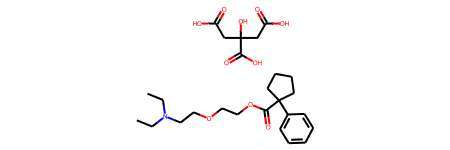

In [6010]:
M1 = mol_list [0]
M1

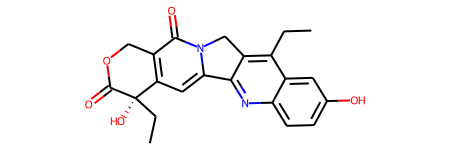

In [6011]:
M2 = mol_list [1]
M2

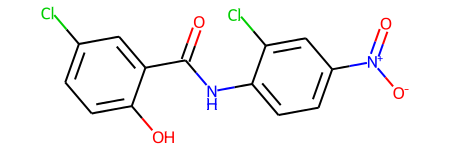

In [6012]:
M3 = mol_list [2]
M3

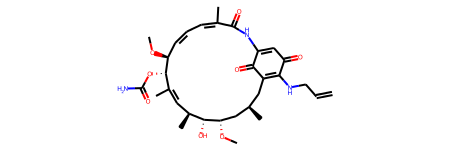

In [6013]:
M4 = mol_list [3]
M4

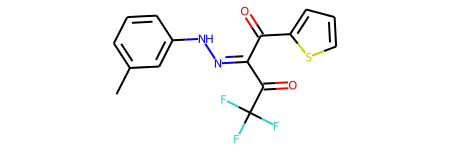

In [6014]:
M5 = mol_list [4]
M5

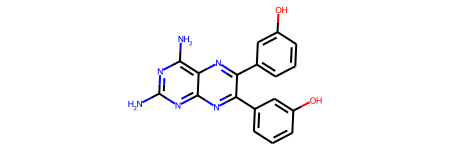

In [6015]:
M6 = mol_list [5]
M6

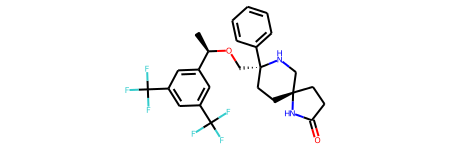

In [6016]:
M7 = mol_list [6]
M7

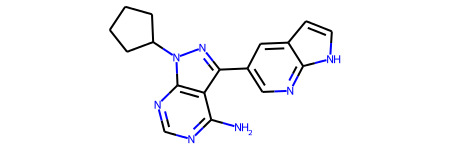

In [6017]:
M8 = mol_list [7]
M8

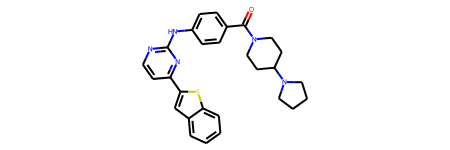

In [6018]:
M9 = mol_list [8]
M9

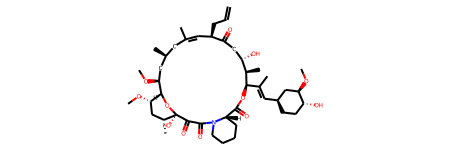

In [6019]:
M10 = mol_list [9]
M10

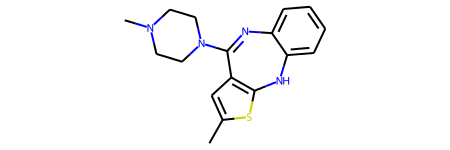

In [6020]:
M11 = mol_list [10]
M11

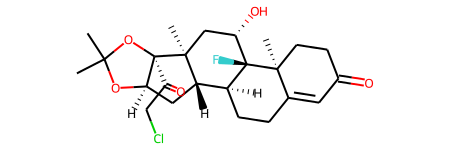

In [6021]:
M12 = mol_list [11]
M12

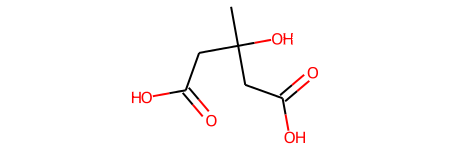

In [6022]:
M13 = mol_list [12]
M13

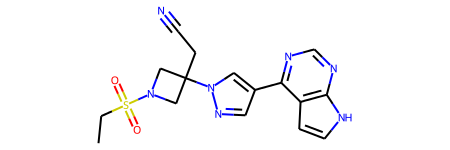

In [6023]:
M14 = mol_list [13]
M14

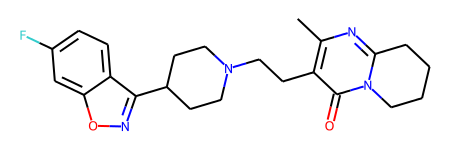

In [6024]:
M15 = mol_list [14]
M15

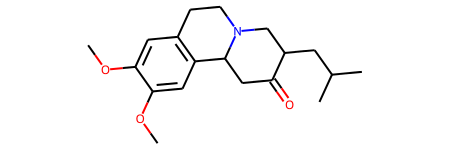

In [6025]:
M16 = mol_list [15]
M16

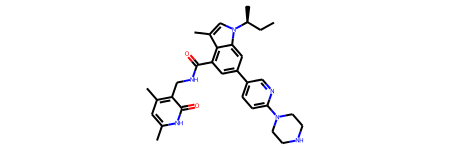

In [6026]:
M17 = mol_list [16]
M17

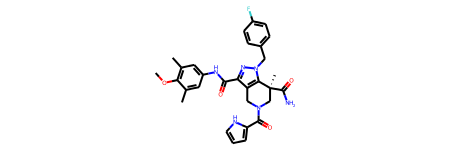

In [6027]:
M18 = mol_list [17]
M18

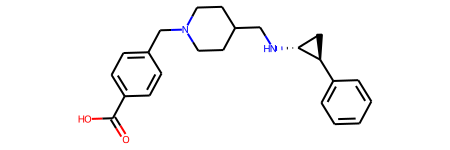

In [6028]:
M19 = mol_list [18]
M19

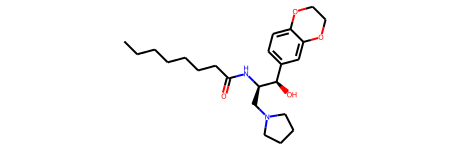

In [6029]:
M20 = mol_list [19]
M20

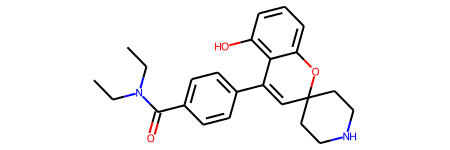

In [6030]:
M21 = mol_list [20]
M21

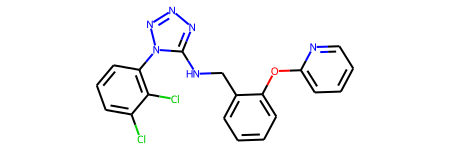

In [6031]:
M22 = mol_list [21]
M22

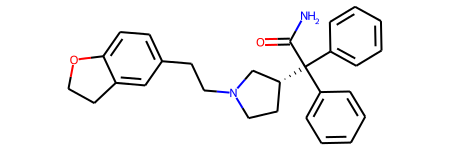

In [6032]:
M23 = mol_list [22]
M23

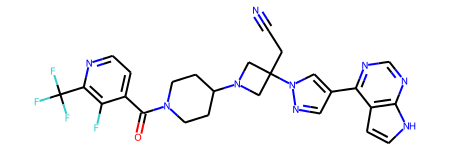

In [6033]:
M24 = mol_list [23]
M24

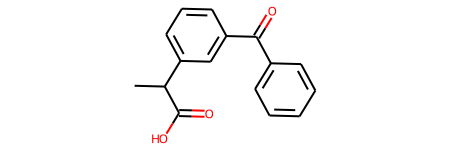

In [6034]:
M25 = mol_list [24]
M25

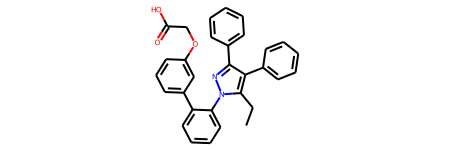

In [6035]:
M26 = mol_list [25]
M26

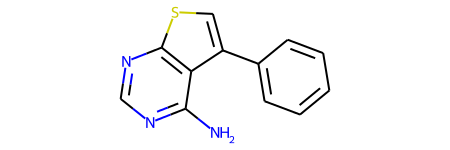

In [6036]:
M27 = mol_list [26]
M27

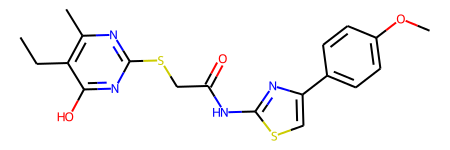

In [6037]:
M28 = mol_list [27]
M28

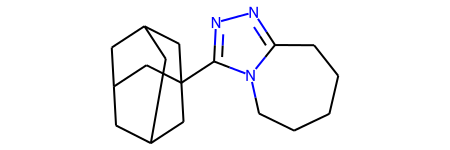

In [6038]:
M29 = mol_list [28]
M29

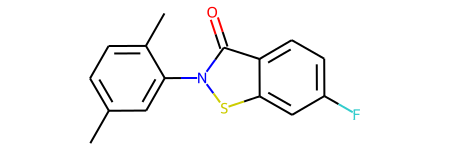

In [6039]:
M30 = mol_list [29]
M30

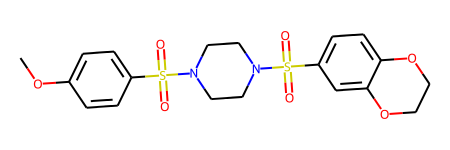

In [6040]:
M31 = mol_list [30]
M31

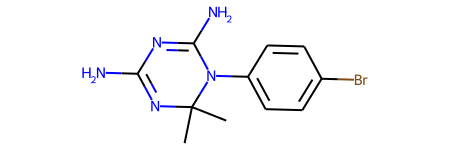

In [6041]:
M32 = mol_list [31]
M32

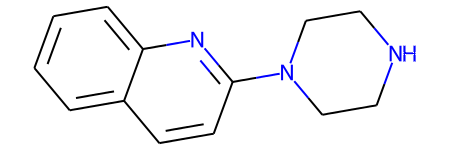

In [6042]:
M33 = mol_list [32]
M33

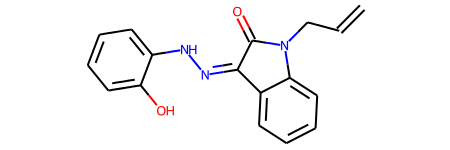

In [6043]:
M34 = mol_list [33]
M34

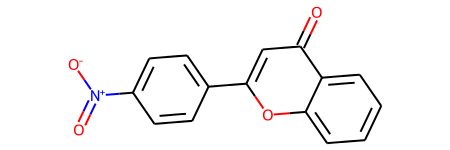

In [6044]:
M35 = mol_list [34]
M35

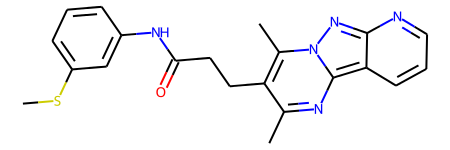

In [6045]:
M36 = mol_list [35]
M36

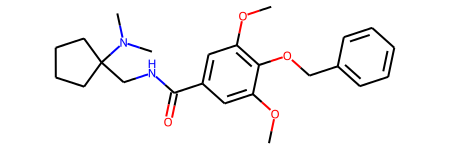

In [6046]:
M37= mol_list [36]
M37

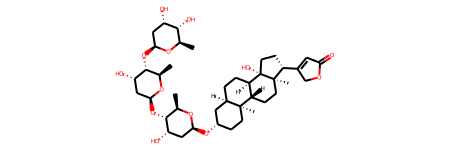

In [6047]:
M38= mol_list [37]
M38

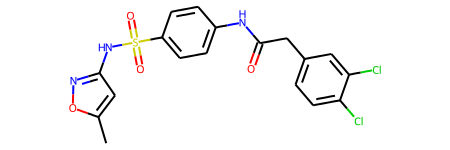

In [6048]:
M39= mol_list [38]
M39

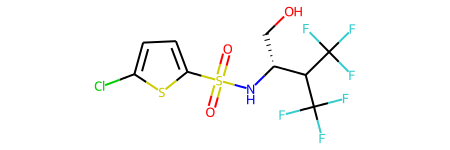

In [6049]:
M40= mol_list [39]
M40

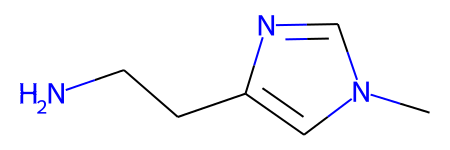

In [6050]:
M41= mol_list [40]
M41

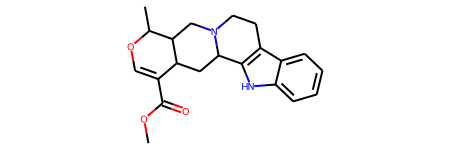

In [6051]:
M42= mol_list [41]
M42

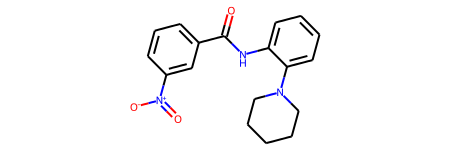

In [6052]:
M43= mol_list [42]
M43

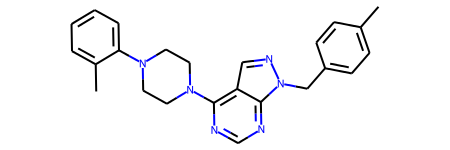

In [6053]:
M44= mol_list [43]
M44

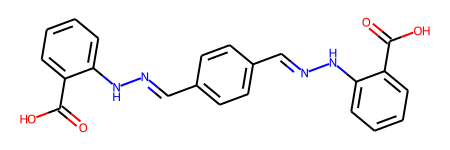

In [6054]:
M45= mol_list [44]
M45

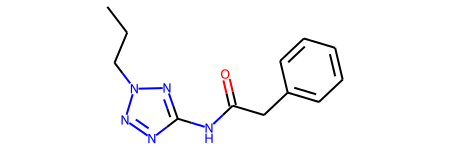

In [6055]:
M46= mol_list [45]
M46

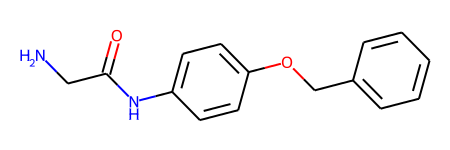

In [6056]:
M47= mol_list [46]
M47

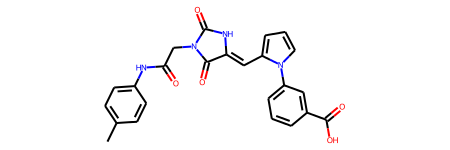

In [6057]:
M48= mol_list [47]
M48

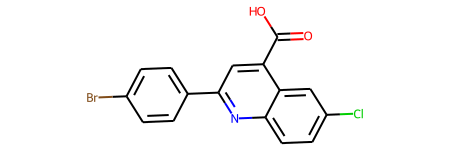

In [6058]:
M49= mol_list [48]
M49

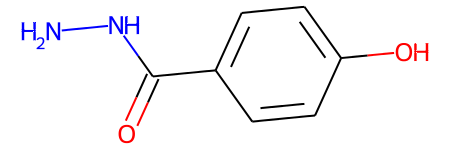

In [6059]:
M50= mol_list [49]
M50

In [6060]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[4,
 13,
 23,
 33,
 36,
 37,
 64,
 80,
 113,
 114,
 138,
 147,
 172,
 175,
 219,
 251,
 271,
 292,
 294,
 315,
 356,
 389,
 407,
 436,
 444,
 540,
 556,
 614,
 620,
 625,
 650,
 691,
 695,
 713,
 726,
 772,
 807,
 833,
 849,
 852,
 880,
 881,
 884,
 893,
 926,
 927,
 932,
 953,
 956,
 957,
 968]

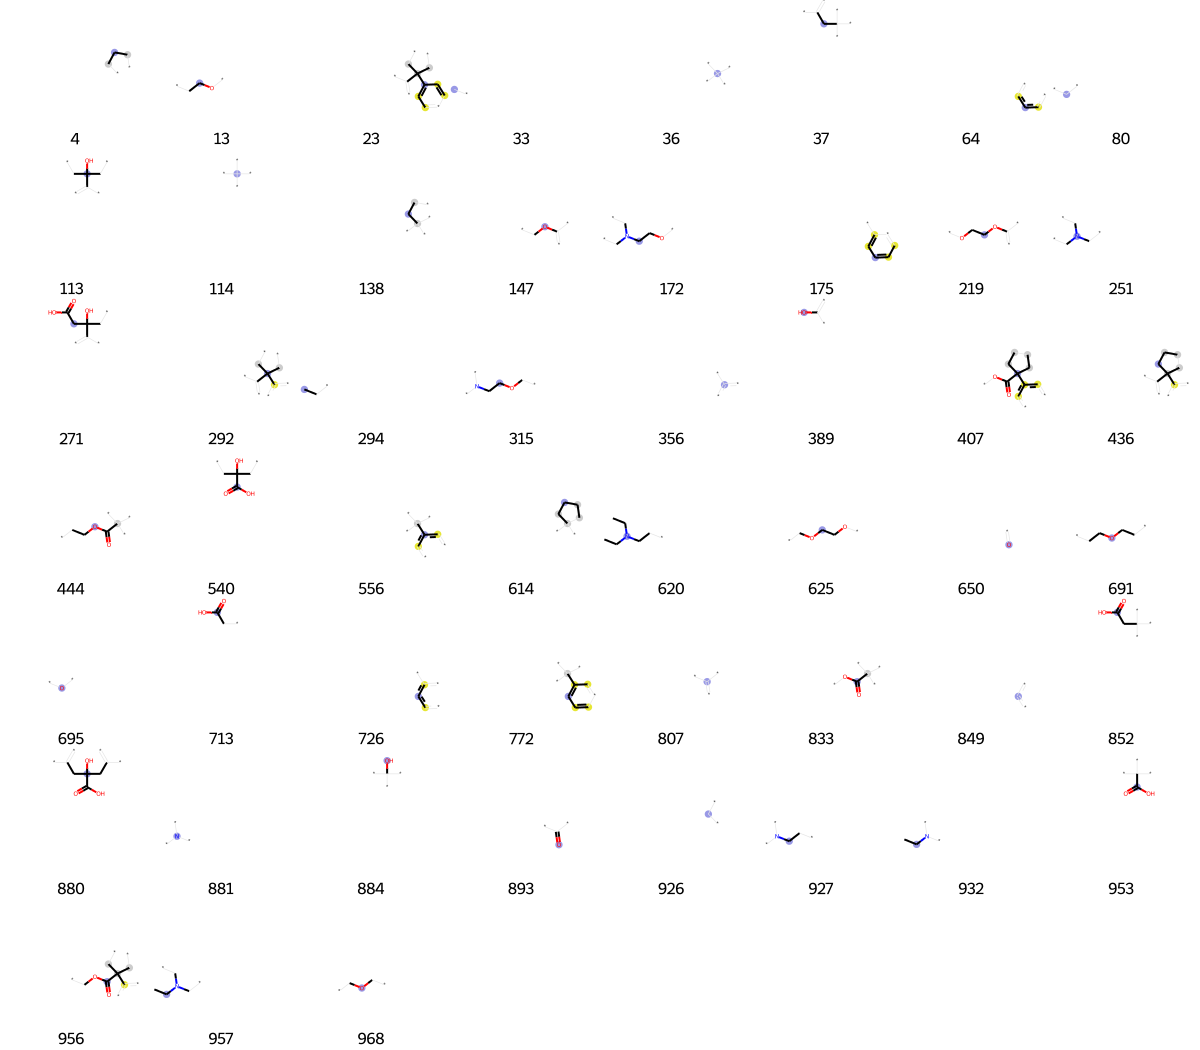

In [6061]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [6062]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[33,
 36,
 73,
 80,
 97,
 111,
 130,
 189,
 233,
 248,
 268,
 289,
 294,
 314,
 323,
 327,
 333,
 356,
 361,
 369,
 375,
 378,
 381,
 387,
 389,
 392,
 441,
 472,
 504,
 541,
 578,
 609,
 650,
 656,
 657,
 668,
 706,
 726,
 745,
 762,
 767,
 775,
 794,
 807,
 831,
 849,
 856,
 875,
 922,
 926,
 935,
 943,
 956,
 961,
 1010,
 1011]

In [6063]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[125,
 128,
 165,
 171,
 187,
 200,
 216,
 250,
 272,
 352,
 356,
 366,
 451,
 486,
 493,
 561,
 578,
 583,
 650,
 659,
 715,
 726,
 753,
 785,
 790,
 792,
 807,
 816,
 832,
 838,
 847,
 849,
 875,
 888,
 893,
 916,
 939,
 947,
 967]

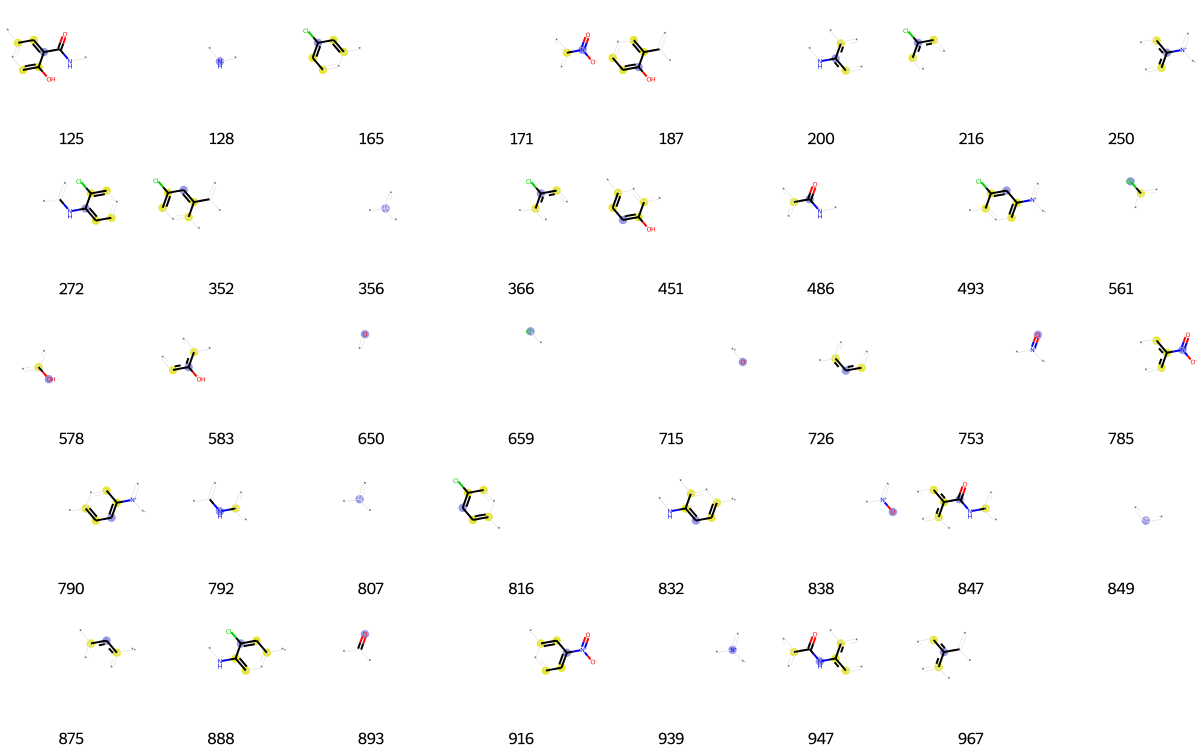

In [6064]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [6065]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[7,
 33,
 36,
 43,
 53,
 59,
 60,
 73,
 80,
 84,
 90,
 102,
 106,
 124,
 128,
 139,
 140,
 147,
 171,
 176,
 217,
 225,
 231,
 233,
 268,
 273,
 278,
 279,
 284,
 285,
 314,
 322,
 342,
 355,
 356,
 368,
 392,
 410,
 452,
 463,
 487,
 551,
 599,
 609,
 621,
 633,
 650,
 694,
 695,
 698,
 706,
 713,
 717,
 744,
 745,
 747,
 750,
 756,
 779,
 798,
 801,
 807,
 841,
 849,
 862,
 866,
 871,
 893,
 911,
 913,
 918,
 922,
 926,
 927,
 937,
 940,
 949,
 1019]

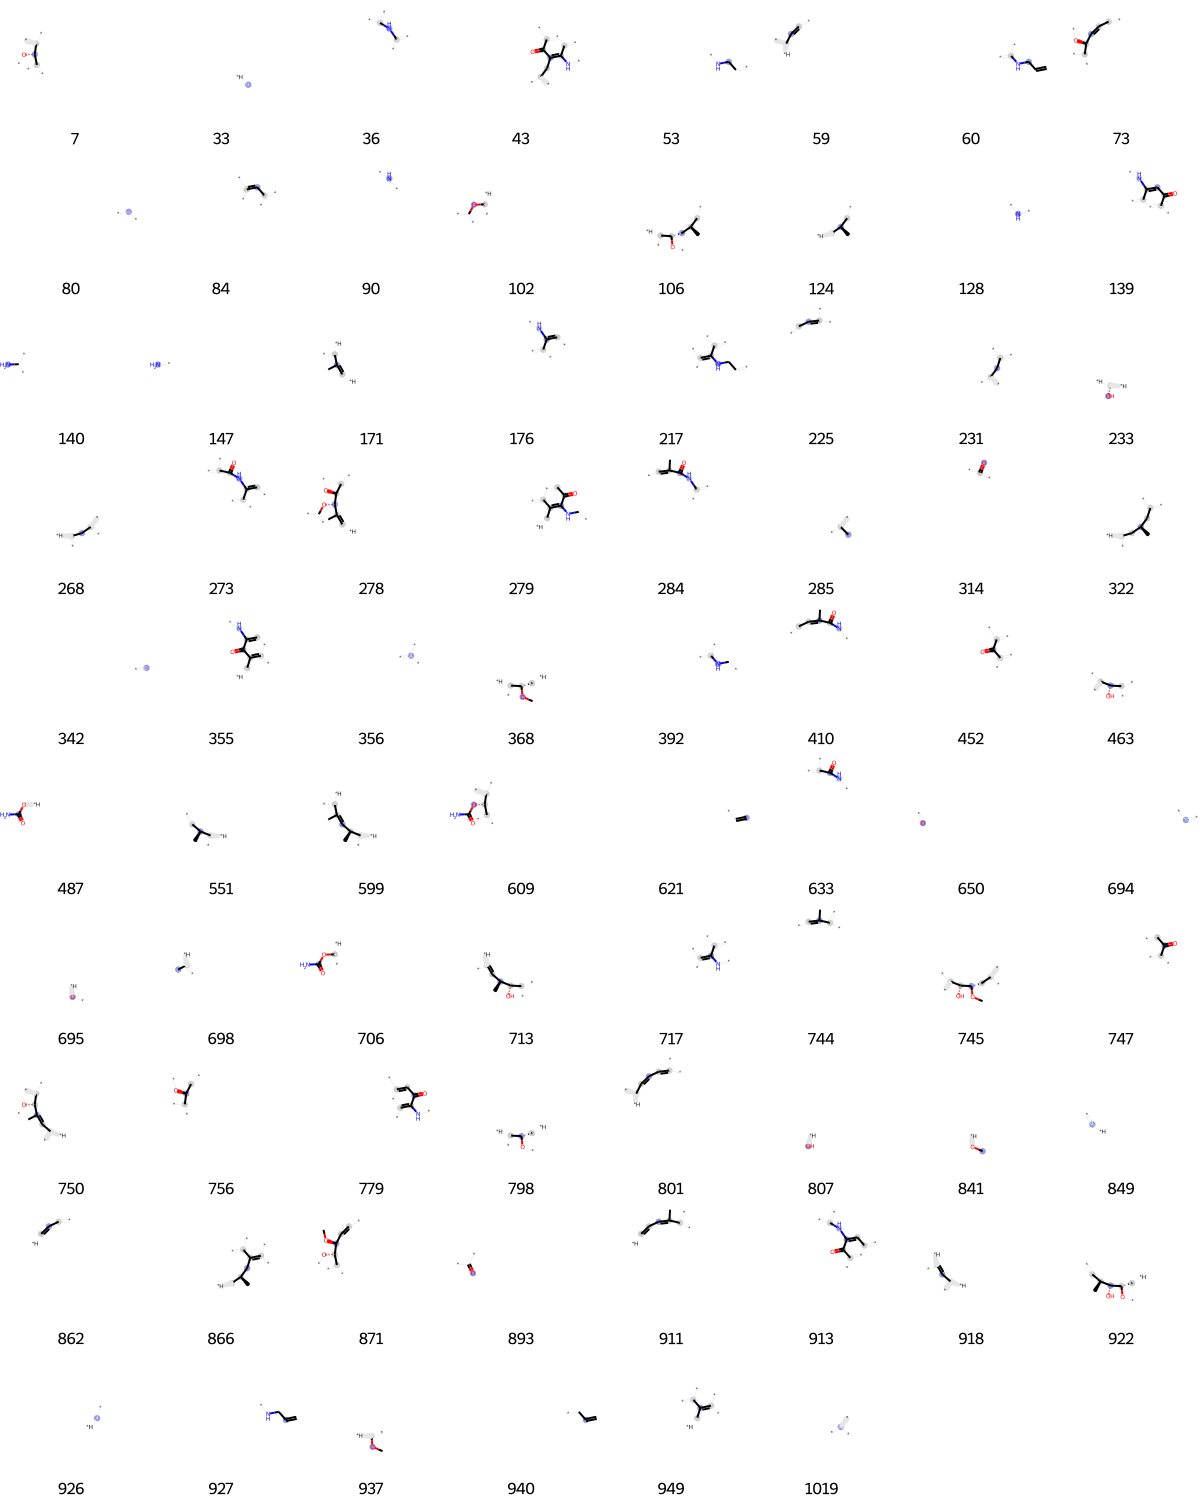

In [6066]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [6067]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[14,
 15,
 31,
 33,
 64,
 79,
 114,
 128,
 191,
 197,
 201,
 241,
 249,
 328,
 338,
 356,
 380,
 383,
 419,
 429,
 480,
 490,
 543,
 557,
 650,
 675,
 698,
 700,
 703,
 725,
 726,
 728,
 755,
 799,
 807,
 849,
 875,
 877,
 882,
 893,
 902,
 904,
 915,
 1013]

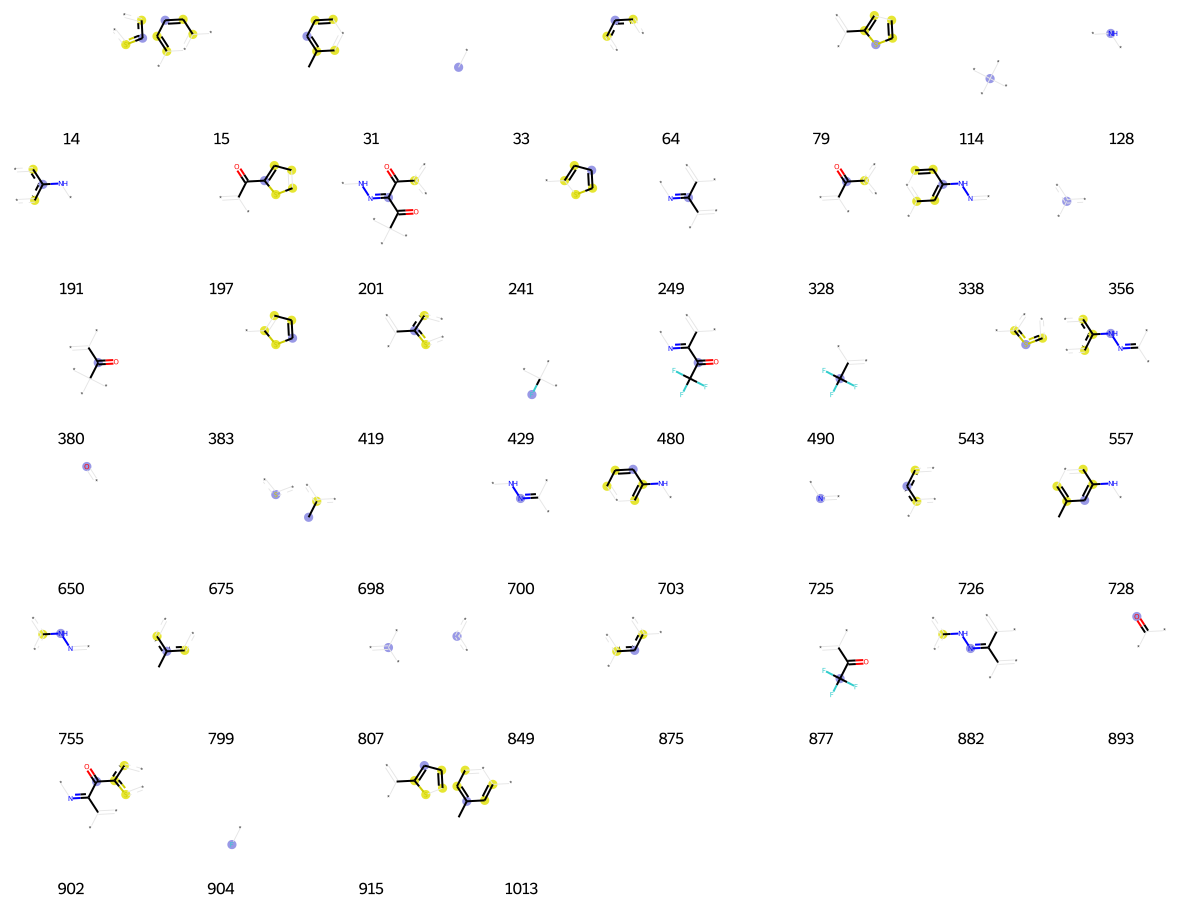

In [6068]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [6069]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[15,
 32,
 64,
 65,
 136,
 147,
 166,
 216,
 323,
 356,
 377,
 378,
 381,
 409,
 433,
 435,
 554,
 578,
 600,
 647,
 677,
 700,
 726,
 736,
 745,
 807,
 831,
 849,
 855,
 875,
 883,
 978,
 1015]

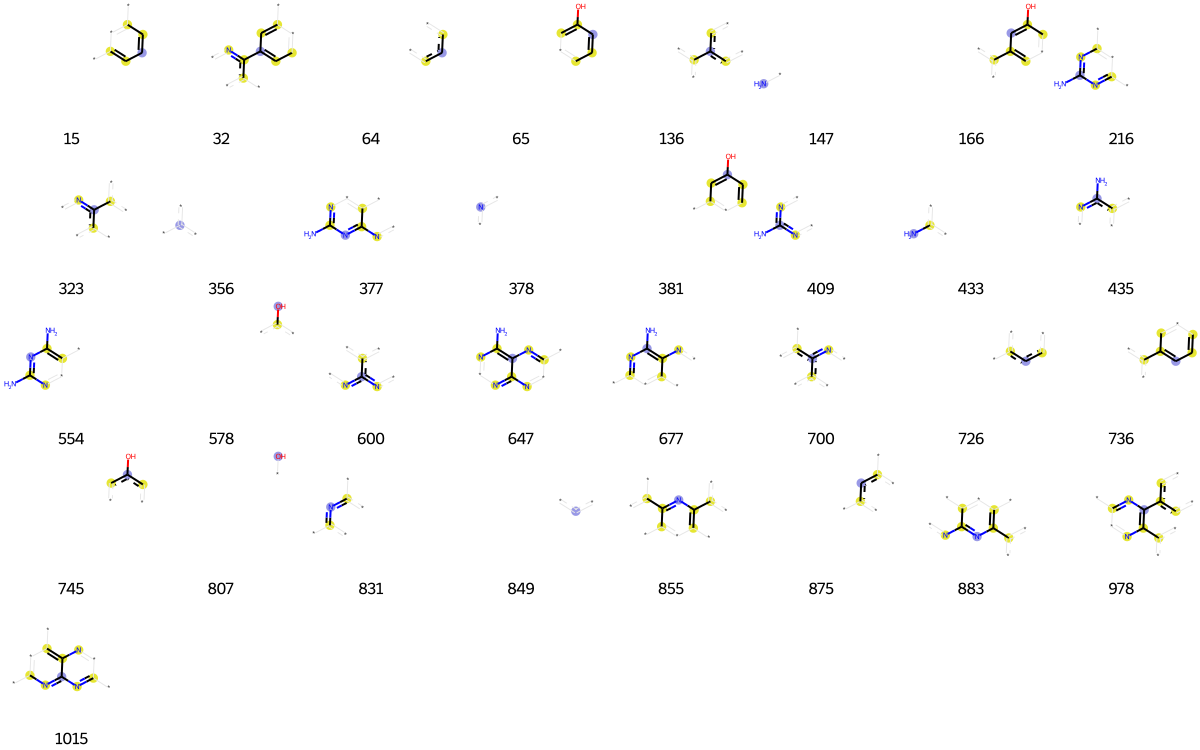

In [6070]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [6071]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[1,
 12,
 31,
 33,
 36,
 41,
 64,
 80,
 90,
 114,
 121,
 125,
 134,
 138,
 175,
 234,
 236,
 268,
 283,
 293,
 314,
 316,
 341,
 356,
 389,
 393,
 394,
 396,
 423,
 429,
 441,
 447,
 551,
 556,
 650,
 670,
 682,
 695,
 714,
 726,
 727,
 743,
 752,
 772,
 790,
 805,
 809,
 849,
 875,
 884,
 903,
 904,
 910,
 926,
 1015]

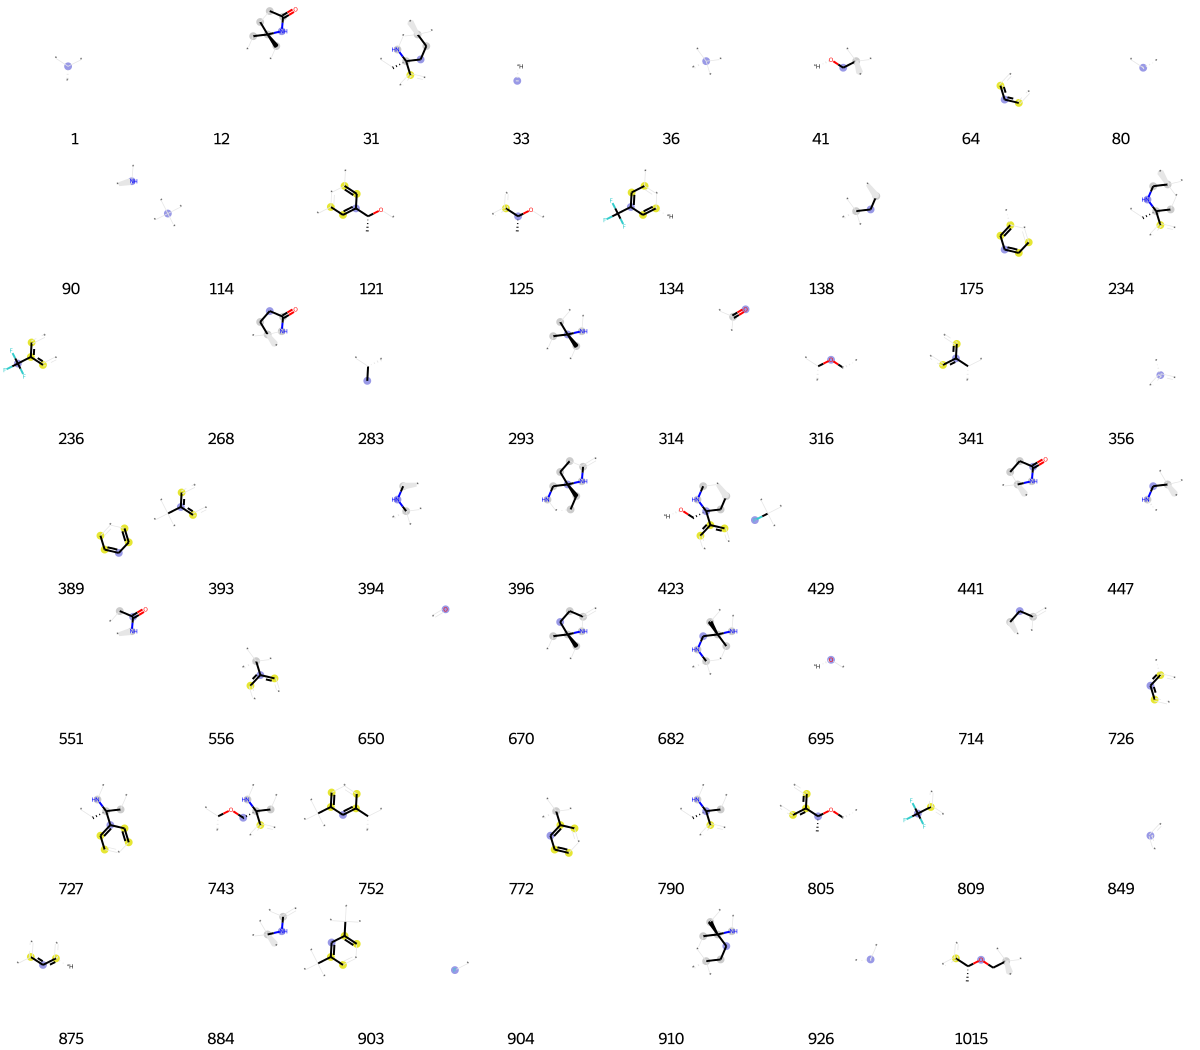

In [6072]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [6073]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[4,
 7,
 90,
 128,
 136,
 147,
 204,
 209,
 267,
 301,
 323,
 353,
 356,
 378,
 428,
 433,
 435,
 459,
 463,
 479,
 482,
 489,
 503,
 505,
 511,
 548,
 565,
 584,
 593,
 672,
 711,
 726,
 757,
 786,
 806,
 831,
 849,
 857,
 875,
 886,
 890,
 926,
 932,
 935,
 960,
 969,
 977,
 1019]

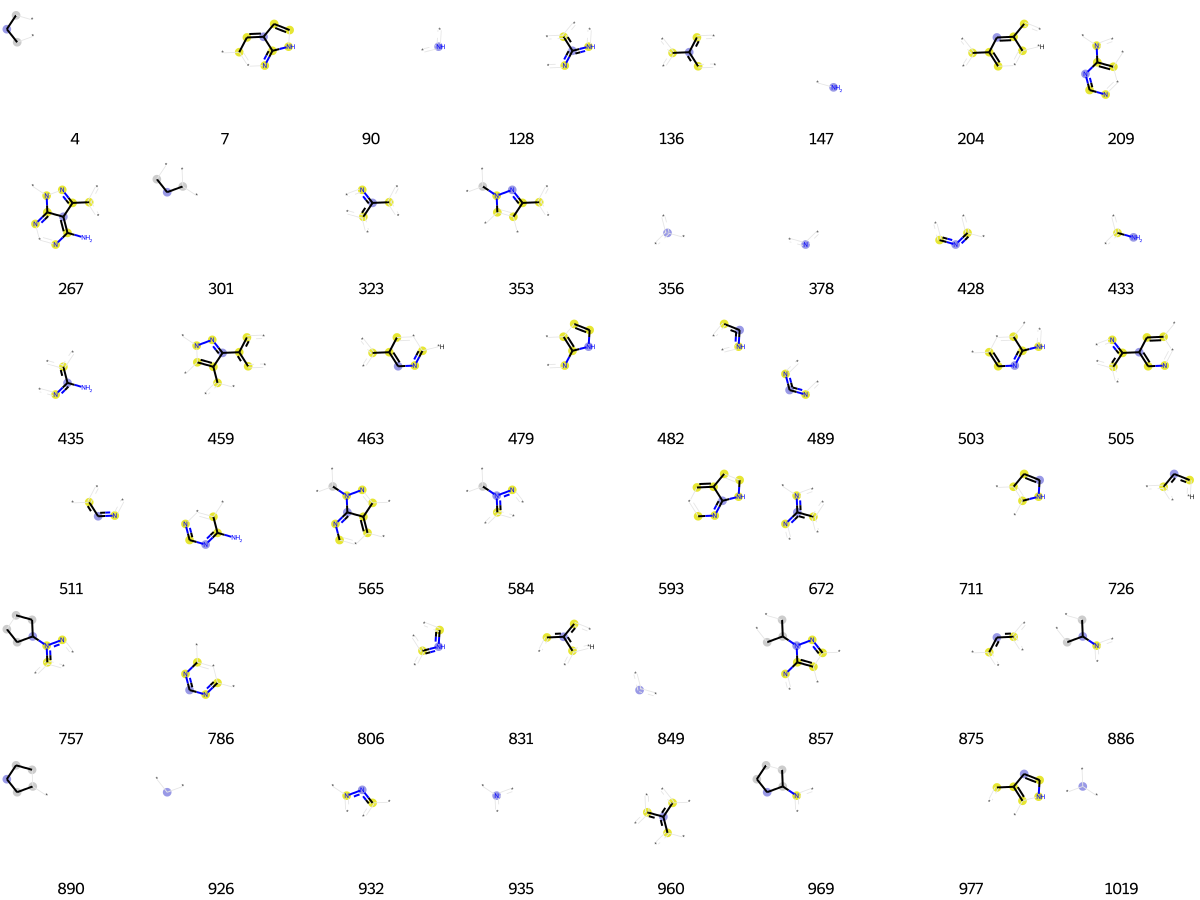

In [6074]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [6075]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[4,
 61,
 62,
 63,
 64,
 71,
 128,
 162,
 175,
 191,
 218,
 287,
 300,
 301,
 356,
 361,
 378,
 399,
 428,
 440,
 456,
 458,
 461,
 480,
 487,
 491,
 497,
 500,
 558,
 562,
 605,
 650,
 652,
 663,
 673,
 675,
 726,
 787,
 795,
 807,
 830,
 831,
 842,
 843,
 847,
 849,
 875,
 885,
 886,
 893,
 926,
 935,
 942,
 974,
 980,
 985,
 1019]

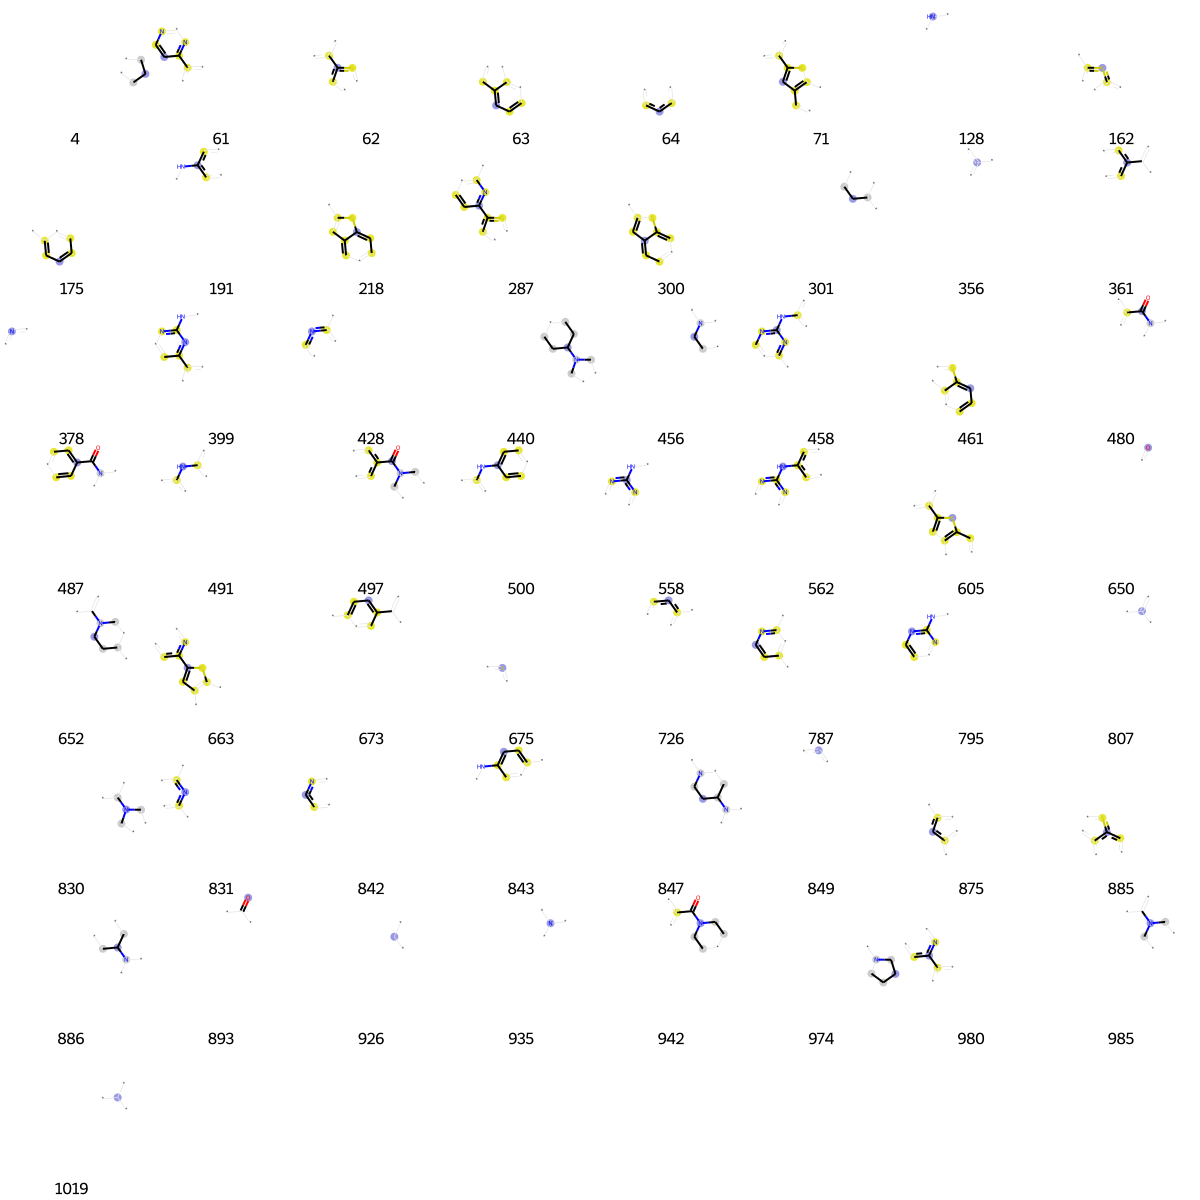

In [6076]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [6077]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[4,
 33,
 36,
 46,
 53,
 54,
 70,
 73,
 80,
 99,
 106,
 124,
 125,
 130,
 160,
 172,
 191,
 207,
 221,
 231,
 233,
 256,
 268,
 272,
 285,
 288,
 301,
 305,
 314,
 322,
 342,
 349,
 356,
 364,
 368,
 370,
 456,
 489,
 516,
 547,
 552,
 582,
 597,
 621,
 632,
 634,
 641,
 647,
 650,
 656,
 684,
 694,
 695,
 698,
 703,
 750,
 783,
 784,
 786,
 798,
 807,
 825,
 841,
 849,
 861,
 879,
 882,
 890,
 918,
 926,
 935,
 936,
 937,
 940,
 941,
 948,
 955,
 960,
 974,
 989,
 990,
 1000,
 1002,
 1017,
 1019]

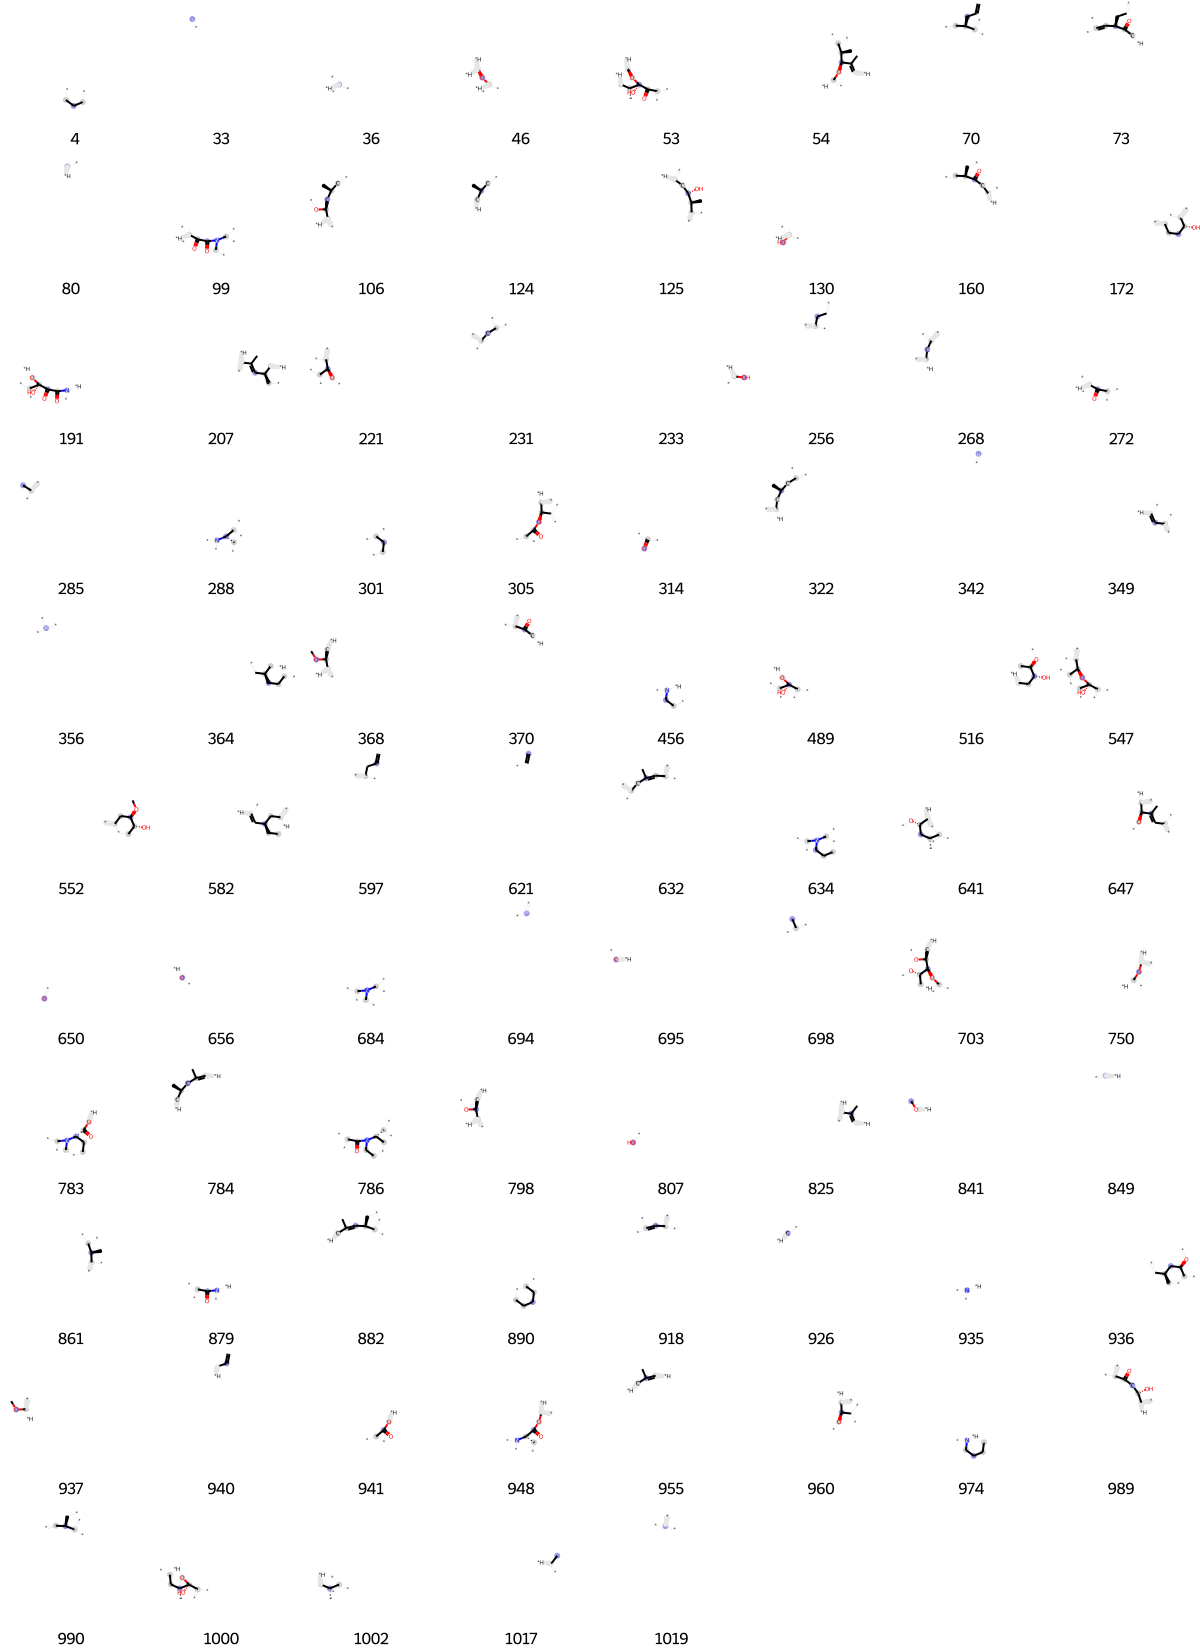

In [6078]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [6079]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[14,
 25,
 33,
 36,
 64,
 90,
 95,
 102,
 103,
 121,
 162,
 175,
 207,
 212,
 229,
 352,
 356,
 378,
 407,
 440,
 446,
 452,
 456,
 482,
 484,
 588,
 608,
 675,
 698,
 721,
 726,
 754,
 849,
 875,
 880,
 926,
 927,
 935,
 944,
 958,
 1001,
 1012]

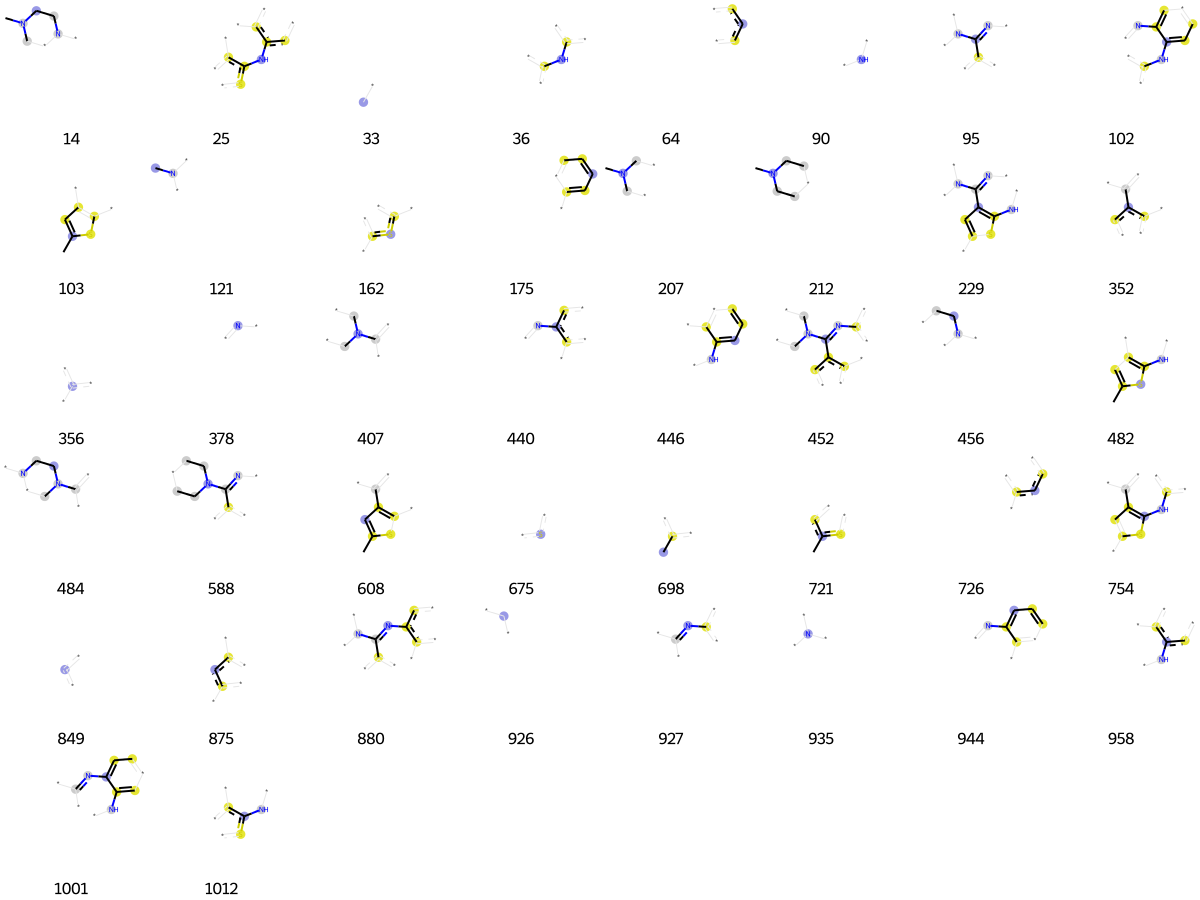

In [6080]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [6081]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[17,
 18,
 33,
 36,
 46,
 59,
 61,
 80,
 84,
 85,
 96,
 118,
 138,
 162,
 182,
 233,
 242,
 250,
 251,
 262,
 268,
 281,
 301,
 314,
 356,
 412,
 418,
 424,
 434,
 479,
 504,
 519,
 650,
 656,
 659,
 667,
 676,
 679,
 703,
 706,
 714,
 734,
 748,
 760,
 786,
 804,
 807,
 841,
 849,
 893,
 900,
 904,
 905,
 910,
 926,
 951,
 960,
 973,
 1019]

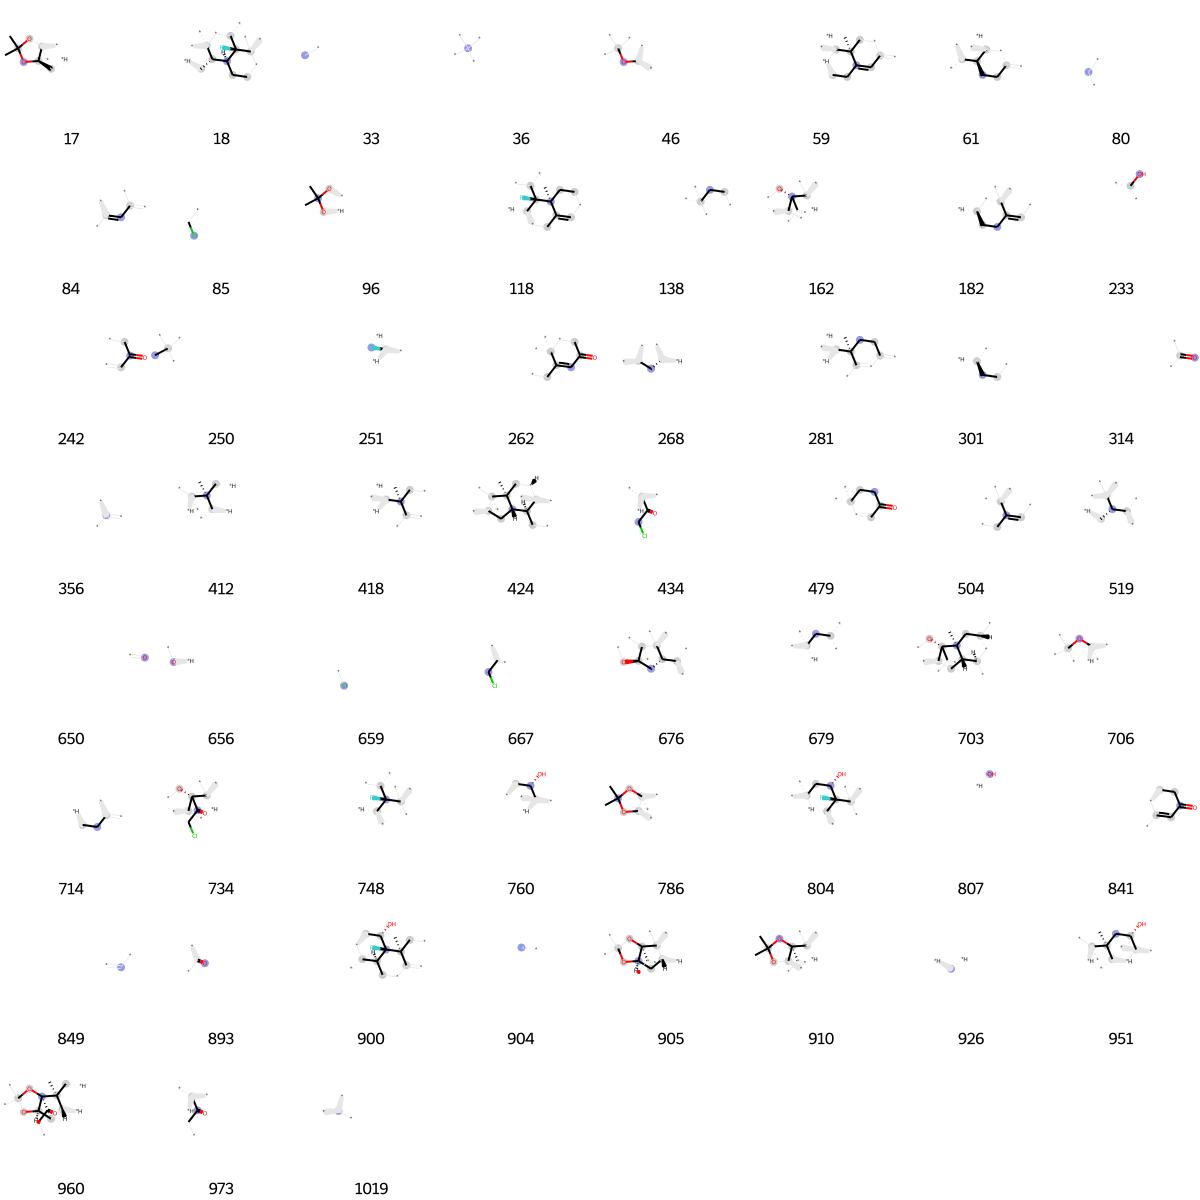

In [6082]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [6083]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[33, 37, 77, 80, 114, 371, 389, 392, 650, 713, 807, 852, 884, 893, 983]

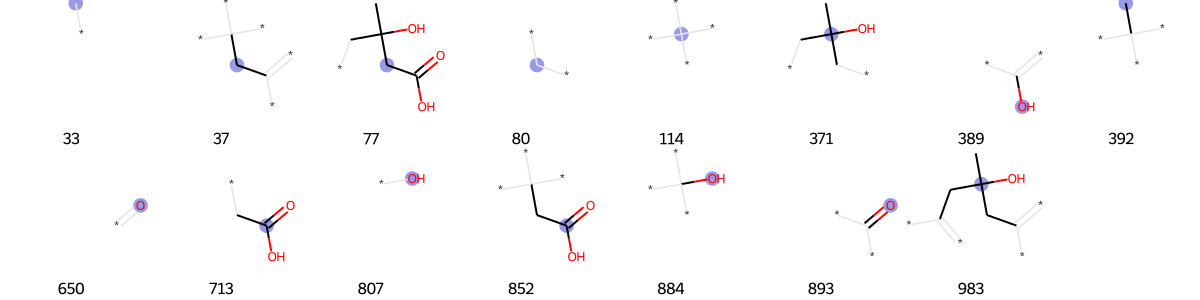

In [6084]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [6085]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[2,
 33,
 36,
 43,
 65,
 80,
 87,
 90,
 128,
 136,
 141,
 147,
 225,
 226,
 232,
 276,
 294,
 323,
 333,
 350,
 356,
 360,
 378,
 428,
 452,
 464,
 478,
 479,
 482,
 489,
 511,
 585,
 602,
 650,
 674,
 675,
 676,
 711,
 723,
 726,
 741,
 786,
 790,
 793,
 806,
 849,
 852,
 872,
 873,
 891,
 923,
 926,
 935,
 947]

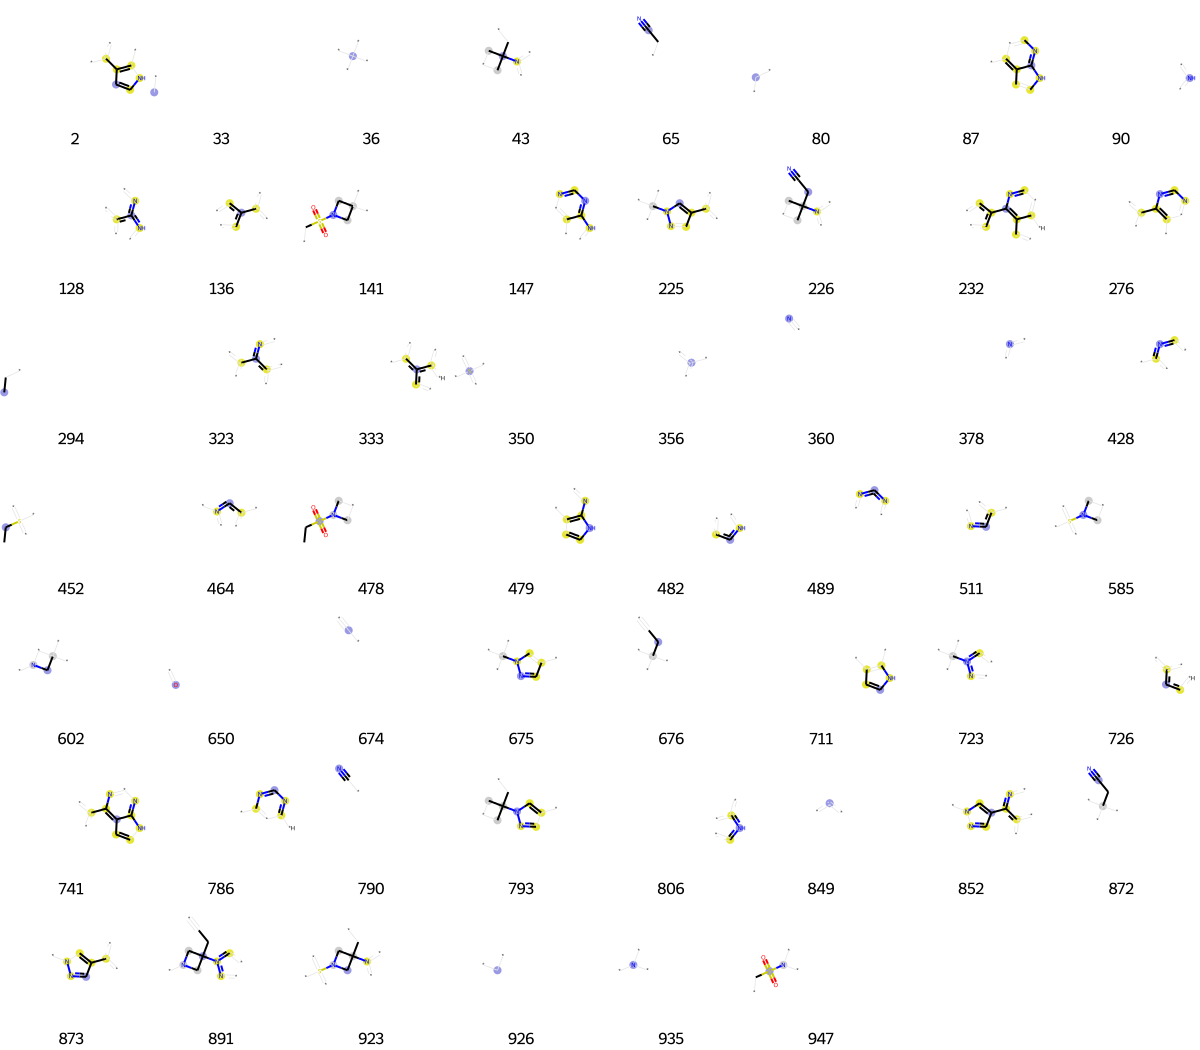

In [6086]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [6087]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[4,
 30,
 33,
 63,
 80,
 91,
 92,
 105,
 112,
 121,
 169,
 179,
 218,
 219,
 237,
 248,
 265,
 301,
 310,
 314,
 333,
 356,
 374,
 378,
 386,
 421,
 439,
 456,
 458,
 463,
 472,
 504,
 518,
 556,
 622,
 628,
 630,
 642,
 646,
 650,
 656,
 698,
 699,
 709,
 714,
 726,
 767,
 784,
 802,
 831,
 849,
 875,
 885,
 904,
 926,
 935,
 974,
 976,
 987,
 1010,
 1019]

In [6088]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1,
 3,
 33,
 62,
 80,
 205,
 212,
 221,
 231,
 249,
 278,
 283,
 287,
 288,
 314,
 327,
 335,
 341,
 356,
 370,
 456,
 512,
 587,
 636,
 649,
 650,
 694,
 695,
 714,
 739,
 791,
 823,
 826,
 830,
 841,
 849,
 864,
 875,
 922,
 926,
 935,
 946,
 1019]

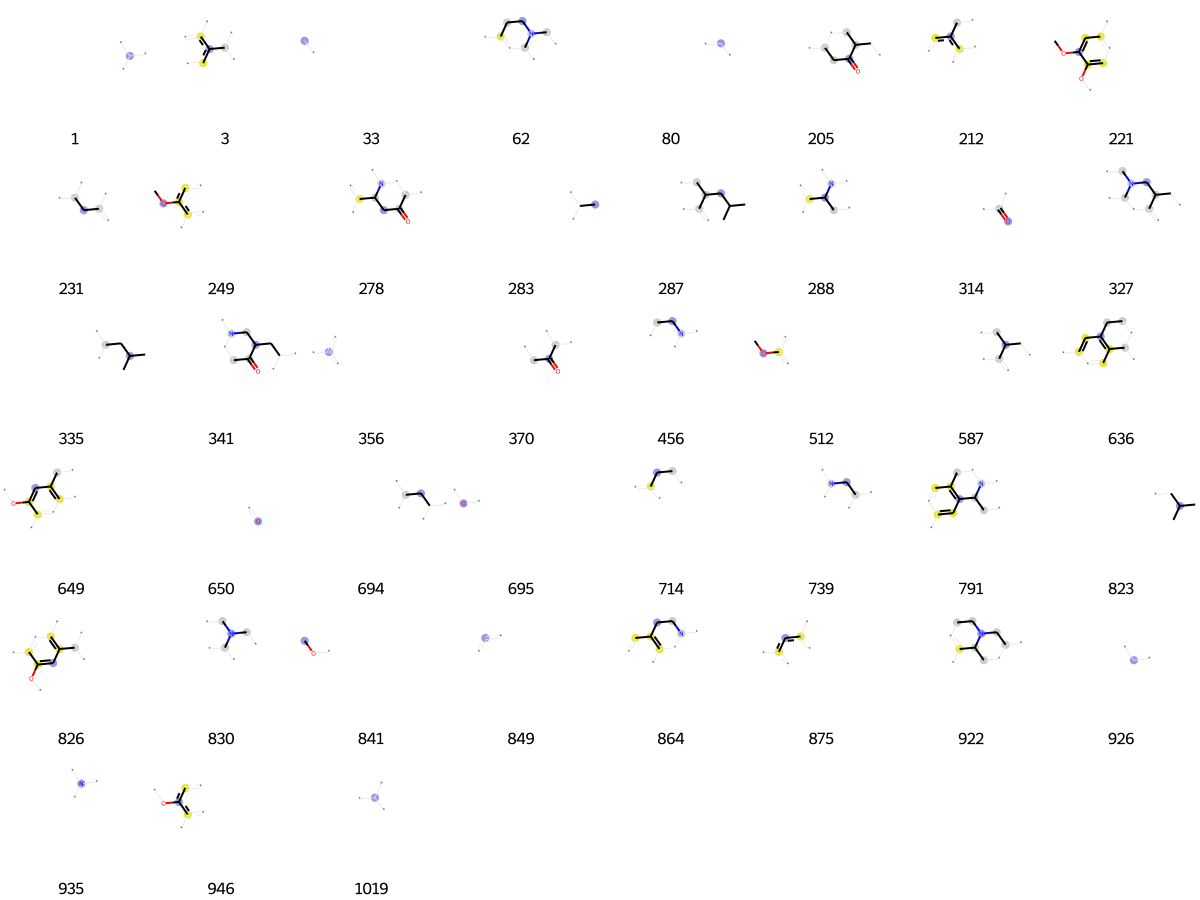

In [6089]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [6090]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[1,
 29,
 33,
 45,
 80,
 90,
 125,
 128,
 136,
 151,
 197,
 217,
 247,
 249,
 255,
 259,
 283,
 284,
 293,
 294,
 305,
 314,
 315,
 346,
 356,
 367,
 373,
 378,
 380,
 392,
 407,
 427,
 428,
 456,
 457,
 463,
 464,
 486,
 490,
 492,
 511,
 520,
 527,
 539,
 567,
 634,
 635,
 650,
 698,
 707,
 721,
 726,
 750,
 760,
 804,
 807,
 813,
 845,
 849,
 875,
 876,
 893,
 896,
 915,
 926,
 935,
 945,
 960,
 967,
 996,
 1010,
 1023]

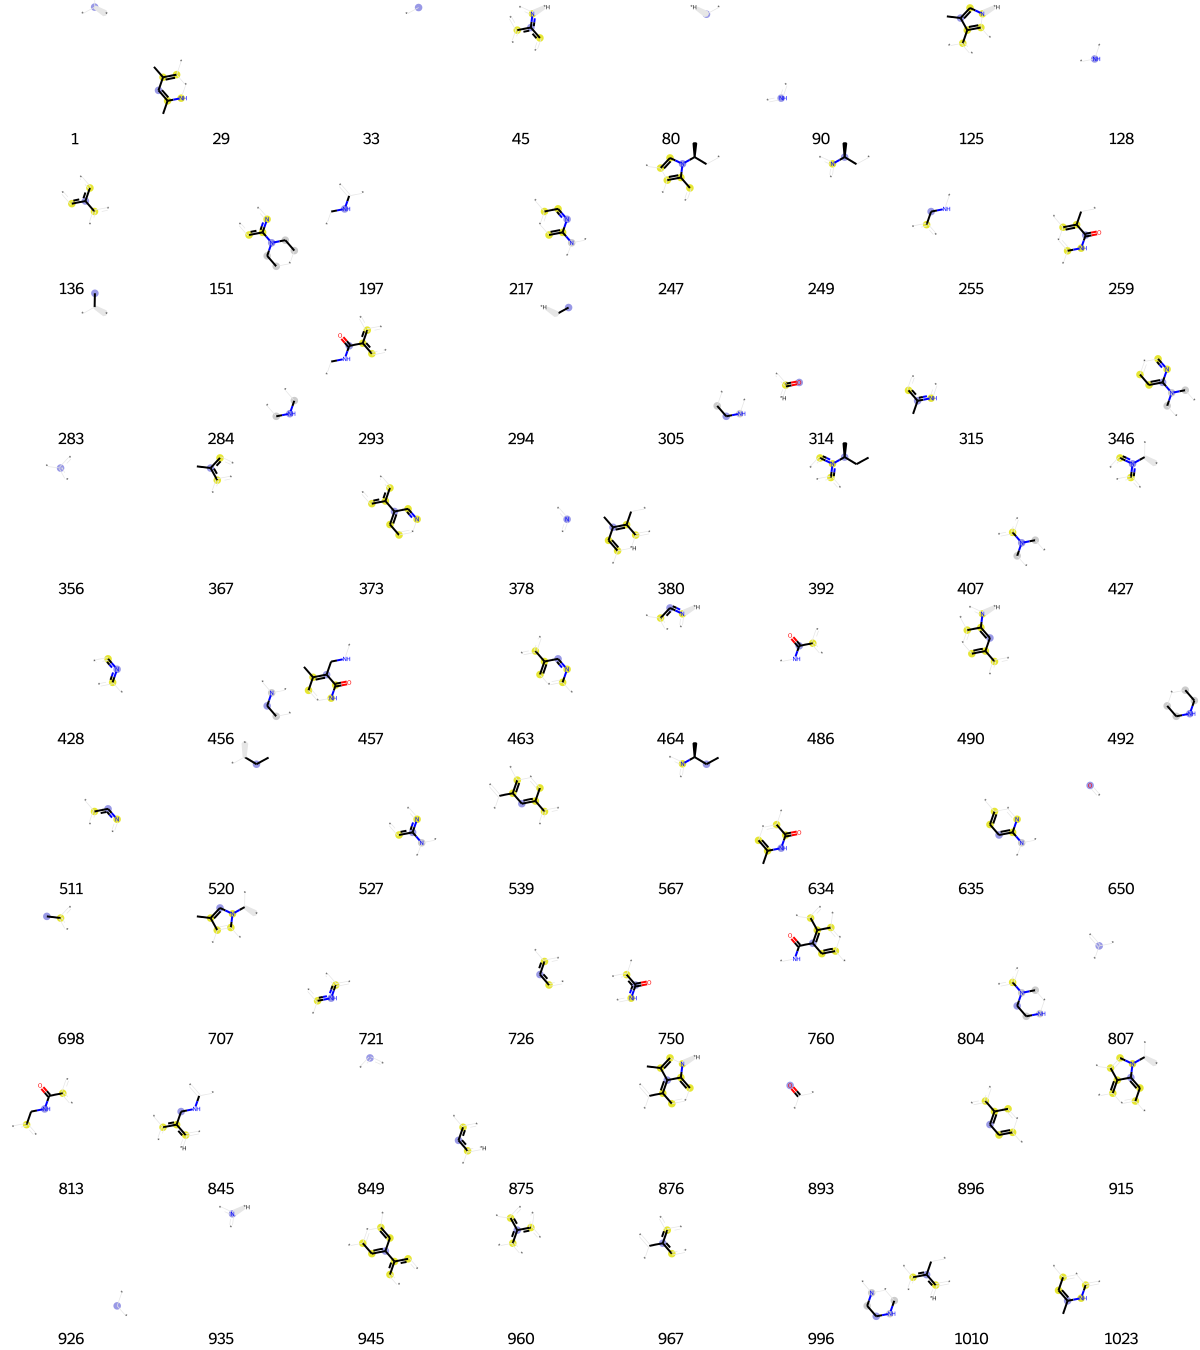

In [6091]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [6092]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[8,
 33,
 36,
 39,
 64,
 80,
 84,
 90,
 96,
 104,
 121,
 128,
 140,
 143,
 147,
 151,
 158,
 160,
 191,
 250,
 261,
 267,
 277,
 310,
 333,
 356,
 361,
 367,
 369,
 378,
 386,
 400,
 480,
 482,
 486,
 490,
 512,
 539,
 575,
 602,
 646,
 650,
 659,
 695,
 698,
 699,
 713,
 726,
 730,
 741,
 751,
 777,
 792,
 806,
 807,
 817,
 829,
 831,
 841,
 849,
 875,
 876,
 893,
 904,
 922,
 926,
 932,
 935,
 954,
 985,
 1005,
 1006]

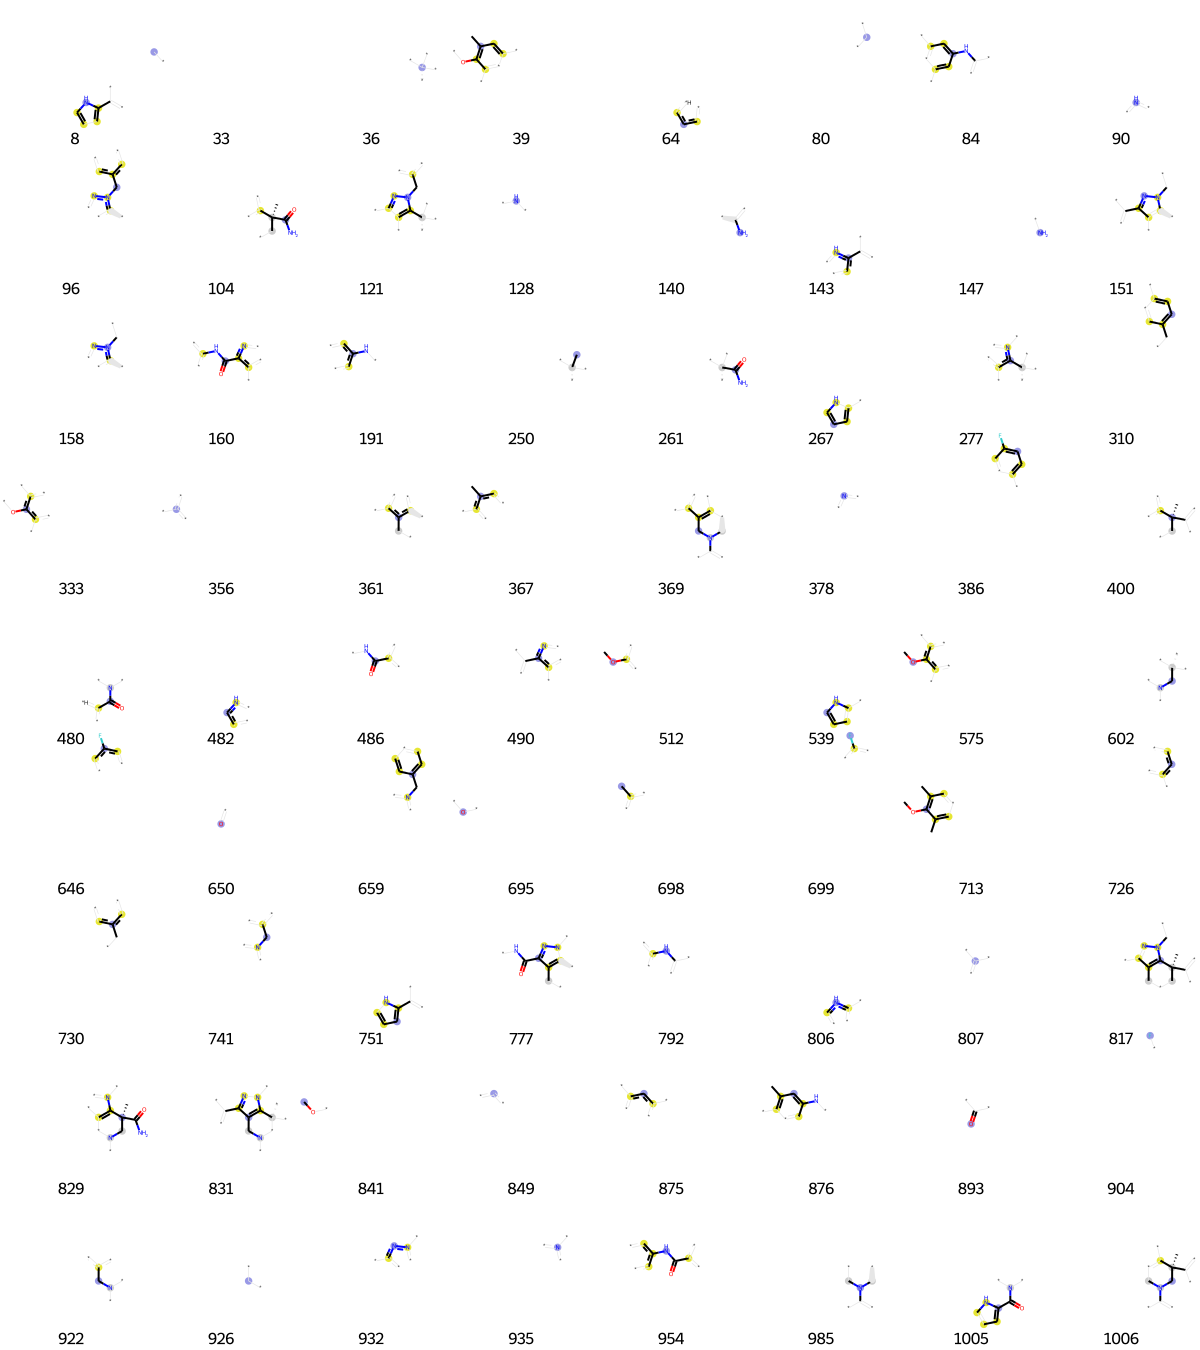

In [6093]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [6094]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[29,
 64,
 80,
 106,
 114,
 128,
 175,
 237,
 254,
 255,
 268,
 272,
 301,
 307,
 310,
 356,
 361,
 379,
 389,
 455,
 456,
 545,
 580,
 639,
 650,
 659,
 673,
 695,
 726,
 730,
 741,
 747,
 767,
 784,
 800,
 807,
 849,
 893,
 897,
 926,
 935,
 964,
 991,
 1019]

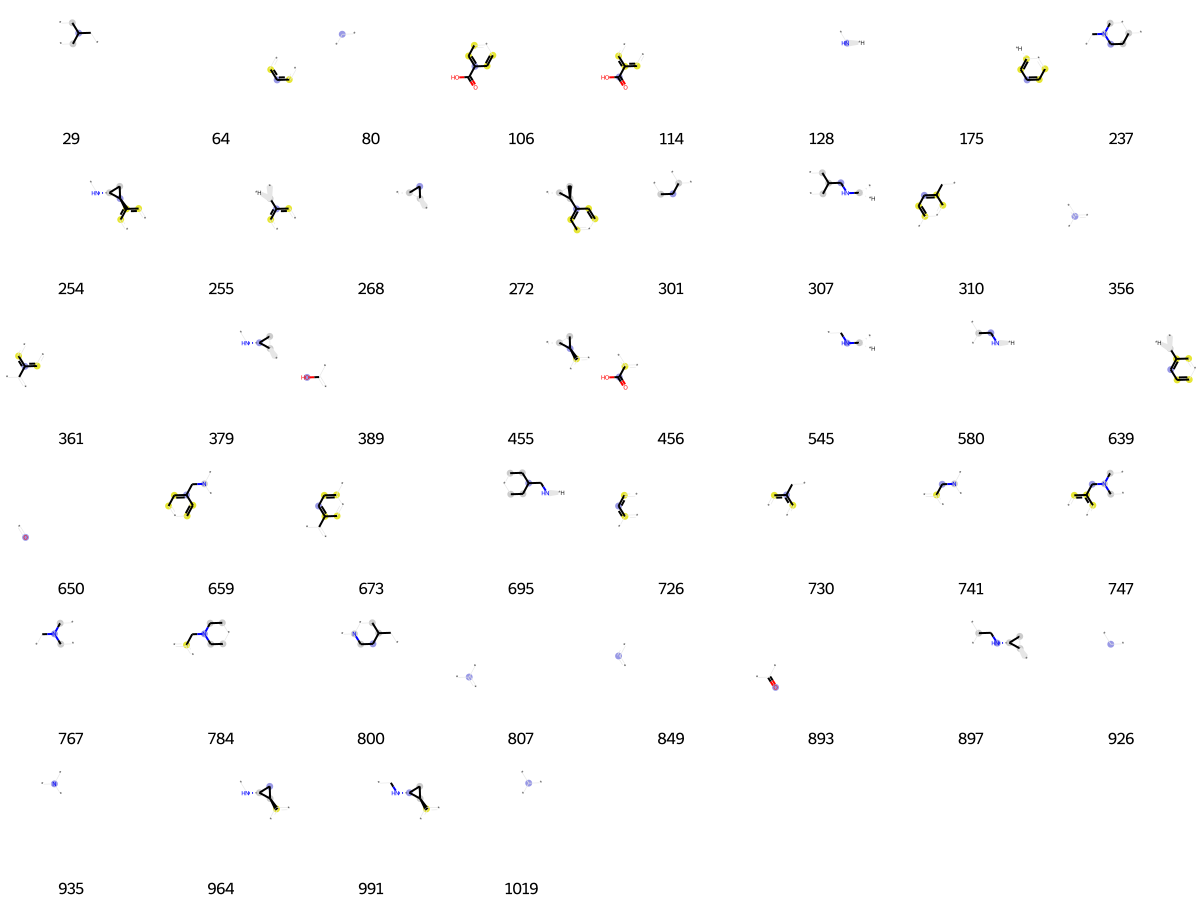

In [6095]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [6096]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[1,
 4,
 11,
 33,
 41,
 80,
 117,
 119,
 128,
 220,
 227,
 243,
 294,
 341,
 356,
 375,
 398,
 420,
 441,
 456,
 465,
 505,
 540,
 591,
 623,
 631,
 650,
 656,
 694,
 726,
 738,
 749,
 752,
 767,
 794,
 807,
 824,
 829,
 836,
 849,
 875,
 881,
 887,
 893,
 895,
 898,
 926,
 935,
 950,
 966,
 974,
 1005]

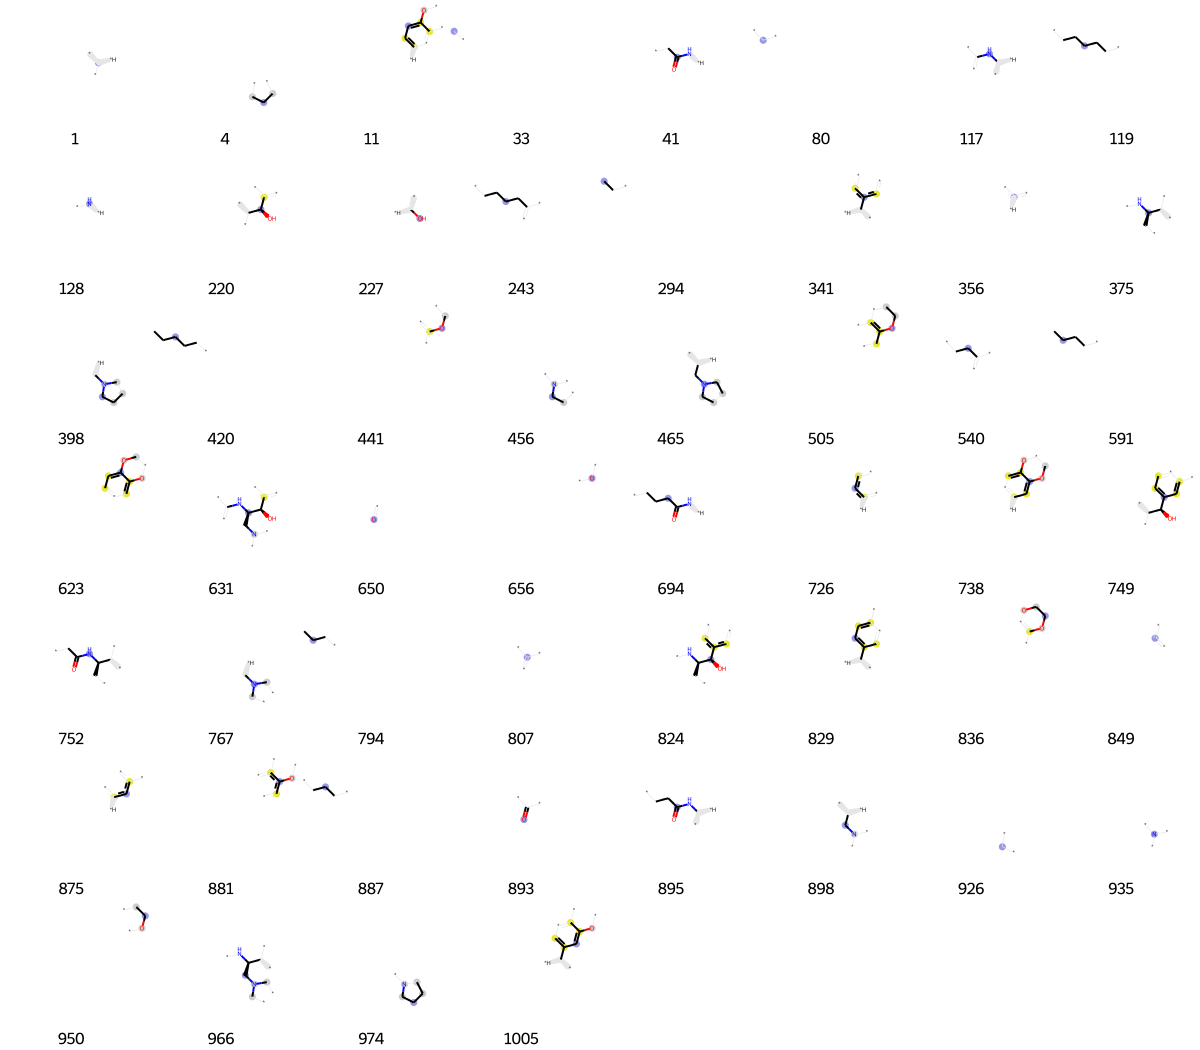

In [6097]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [6098]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[15,
 33,
 36,
 55,
 64,
 80,
 86,
 90,
 136,
 138,
 143,
 178,
 190,
 192,
 197,
 214,
 258,
 268,
 284,
 294,
 305,
 356,
 361,
 406,
 447,
 457,
 492,
 578,
 583,
 587,
 644,
 650,
 656,
 673,
 723,
 726,
 728,
 768,
 807,
 828,
 849,
 881,
 893,
 896,
 926,
 932,
 978,
 1008,
 1022]

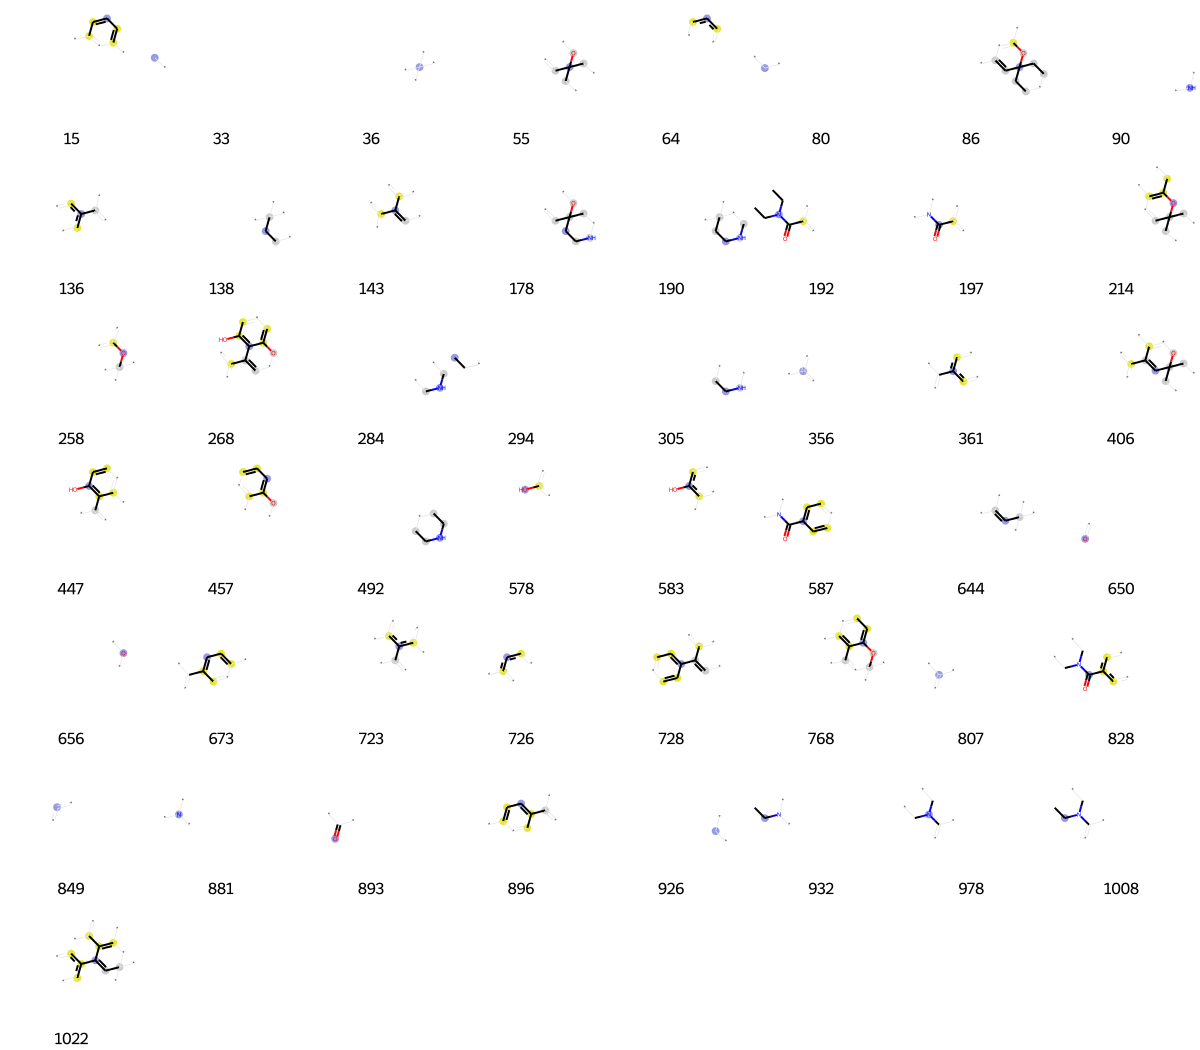

In [6099]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [6100]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[15,
 64,
 80,
 81,
 128,
 131,
 140,
 157,
 175,
 186,
 191,
 205,
 213,
 242,
 245,
 255,
 257,
 259,
 267,
 271,
 325,
 356,
 366,
 378,
 386,
 392,
 428,
 448,
 457,
 484,
 522,
 546,
 561,
 573,
 593,
 623,
 626,
 628,
 659,
 695,
 726,
 759,
 786,
 828,
 842,
 849,
 935,
 946,
 974,
 976,
 1011]

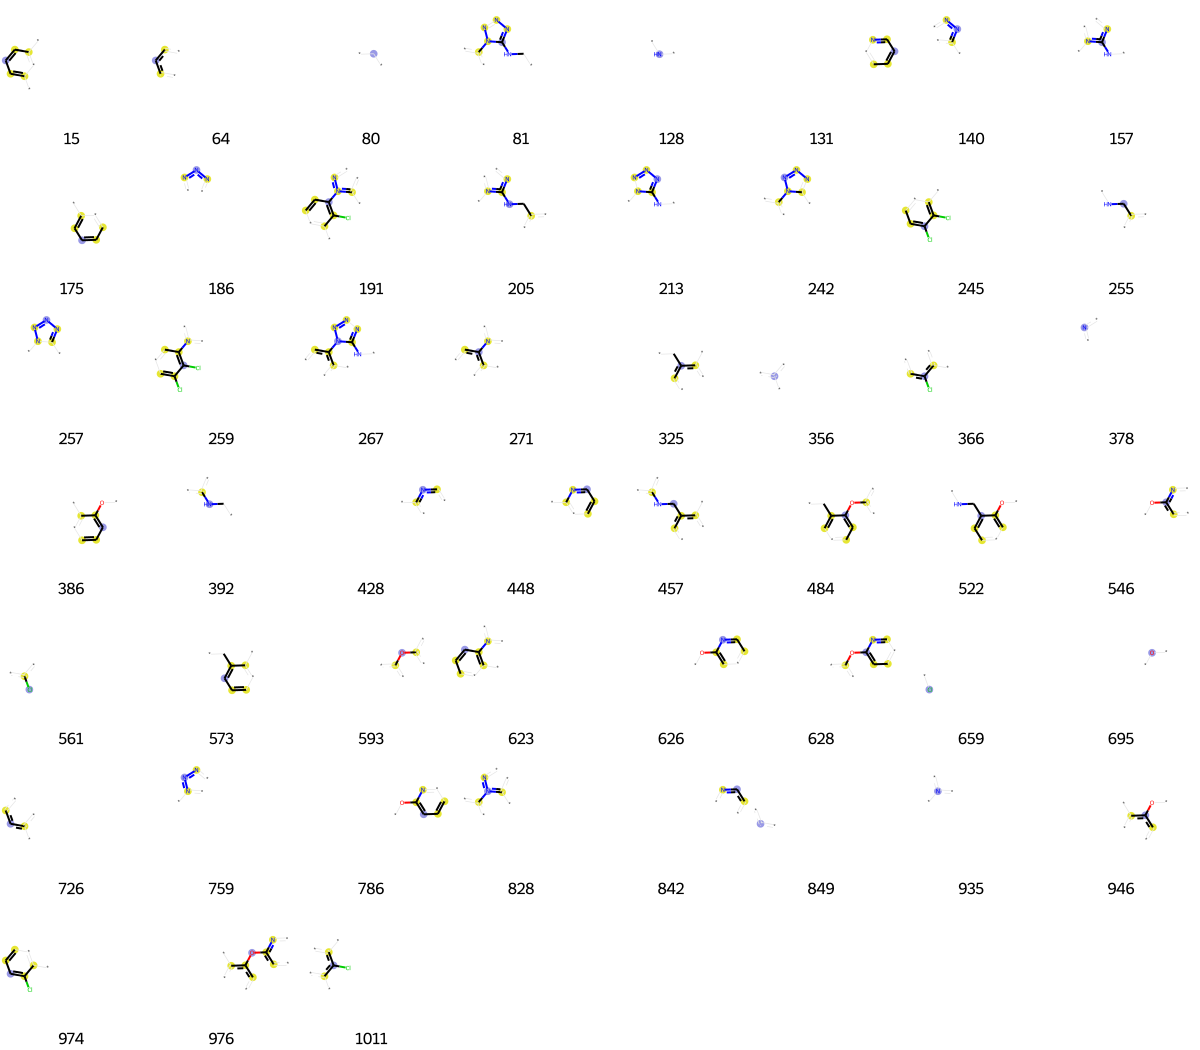

In [6101]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [6102]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[11,
 64,
 72,
 80,
 104,
 114,
 118,
 121,
 140,
 147,
 175,
 212,
 218,
 219,
 237,
 301,
 310,
 317,
 356,
 389,
 393,
 394,
 441,
 456,
 505,
 556,
 586,
 611,
 615,
 650,
 656,
 680,
 714,
 718,
 726,
 730,
 739,
 767,
 774,
 780,
 807,
 849,
 869,
 875,
 881,
 882,
 893,
 926,
 935,
 950,
 993,
 1019]

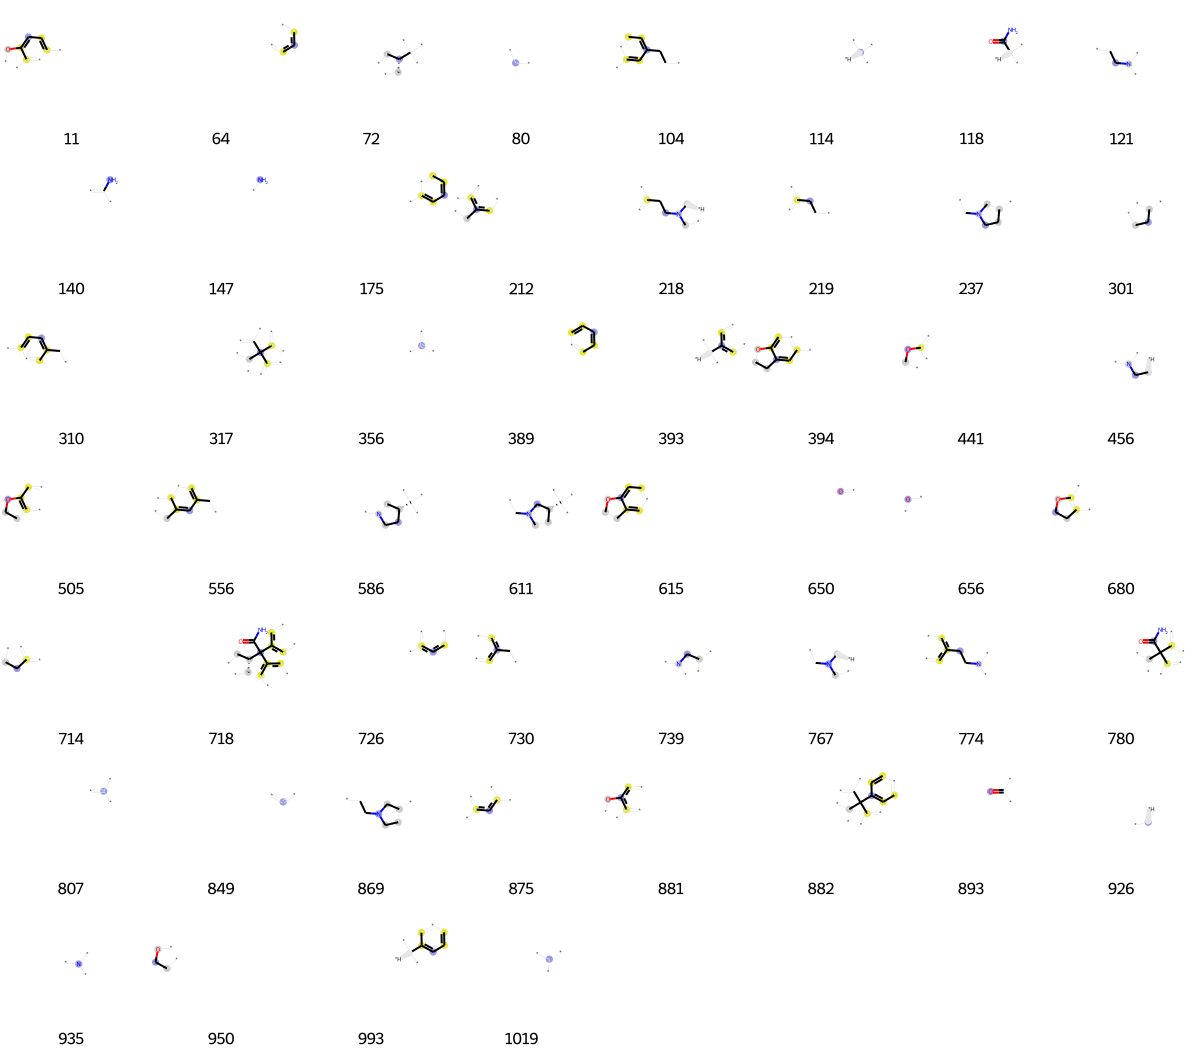

In [6103]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [6104]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[2,
 36,
 43,
 47,
 65,
 80,
 87,
 90,
 114,
 123,
 128,
 136,
 147,
 194,
 225,
 226,
 232,
 276,
 301,
 323,
 333,
 349,
 350,
 356,
 360,
 362,
 378,
 421,
 428,
 429,
 435,
 440,
 456,
 464,
 479,
 480,
 482,
 489,
 511,
 549,
 602,
 650,
 652,
 674,
 675,
 676,
 699,
 711,
 723,
 726,
 741,
 786,
 787,
 790,
 793,
 806,
 807,
 809,
 830,
 842,
 847,
 849,
 852,
 872,
 873,
 886,
 891,
 893,
 904,
 922,
 926,
 935,
 942,
 967,
 985,
 1019]

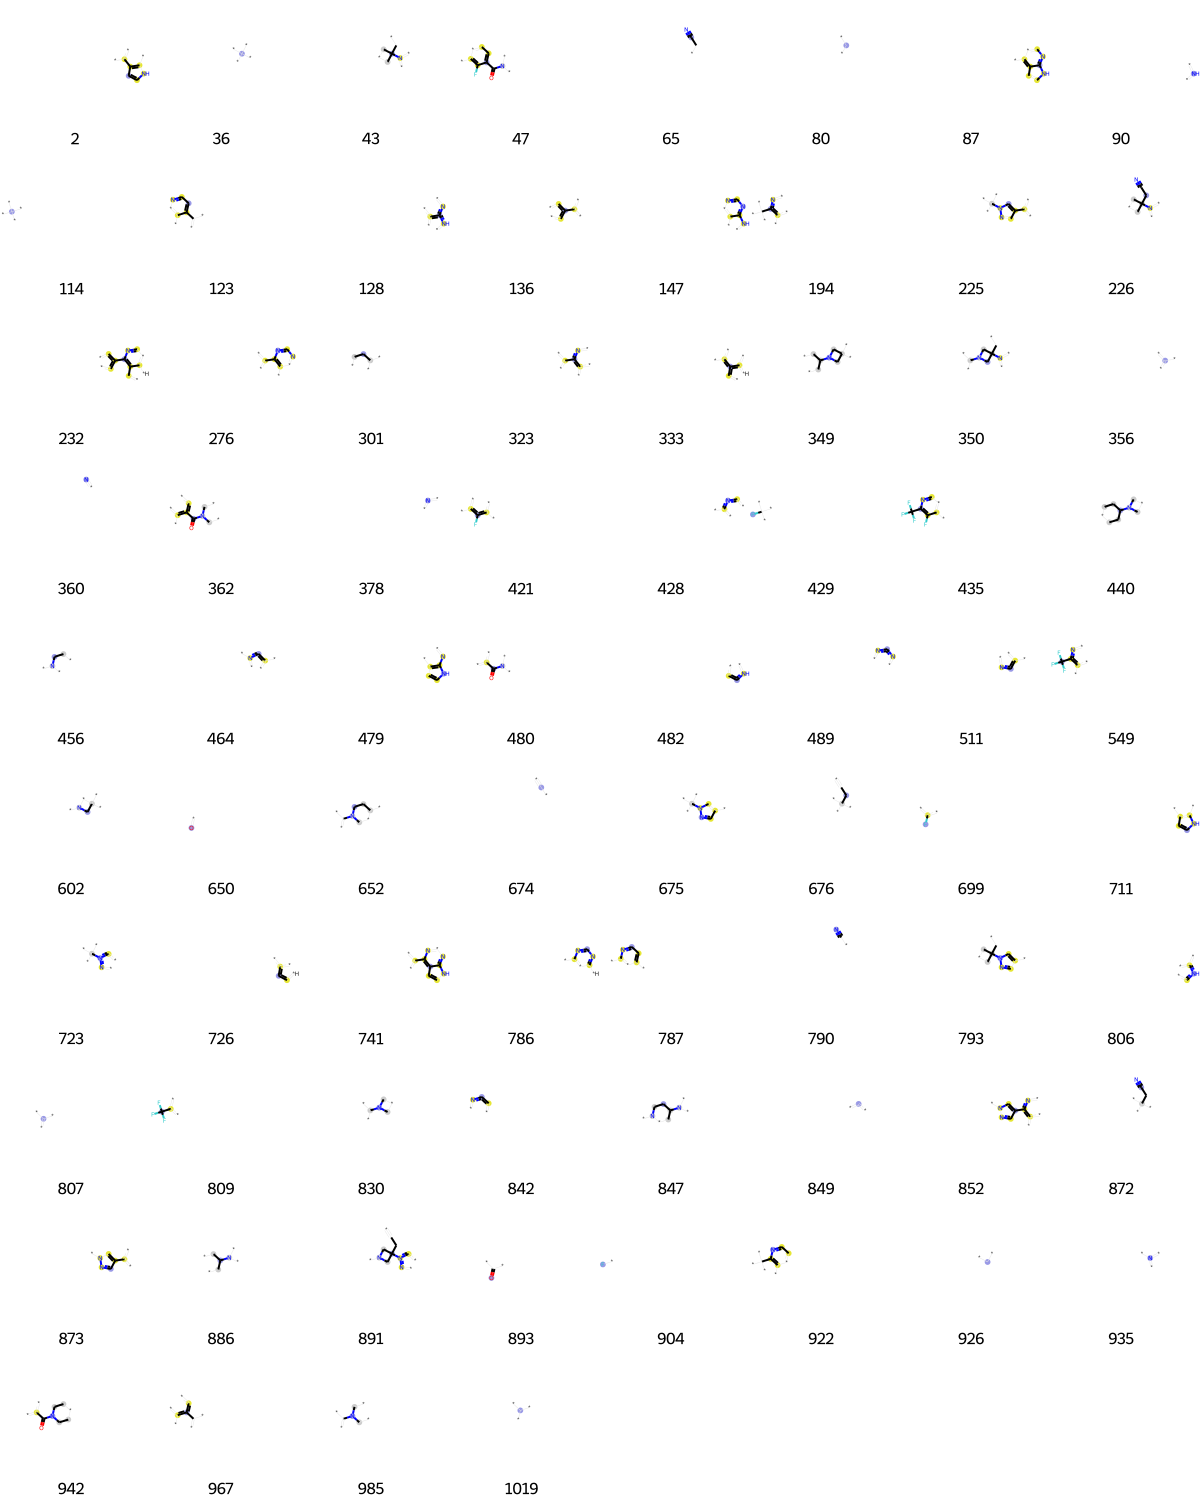

In [6105]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [6106]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[1,
 9,
 15,
 33,
 64,
 105,
 175,
 233,
 283,
 341,
 356,
 361,
 379,
 389,
 557,
 594,
 650,
 726,
 751,
 807,
 820,
 849,
 875,
 893,
 900,
 921,
 961,
 997]

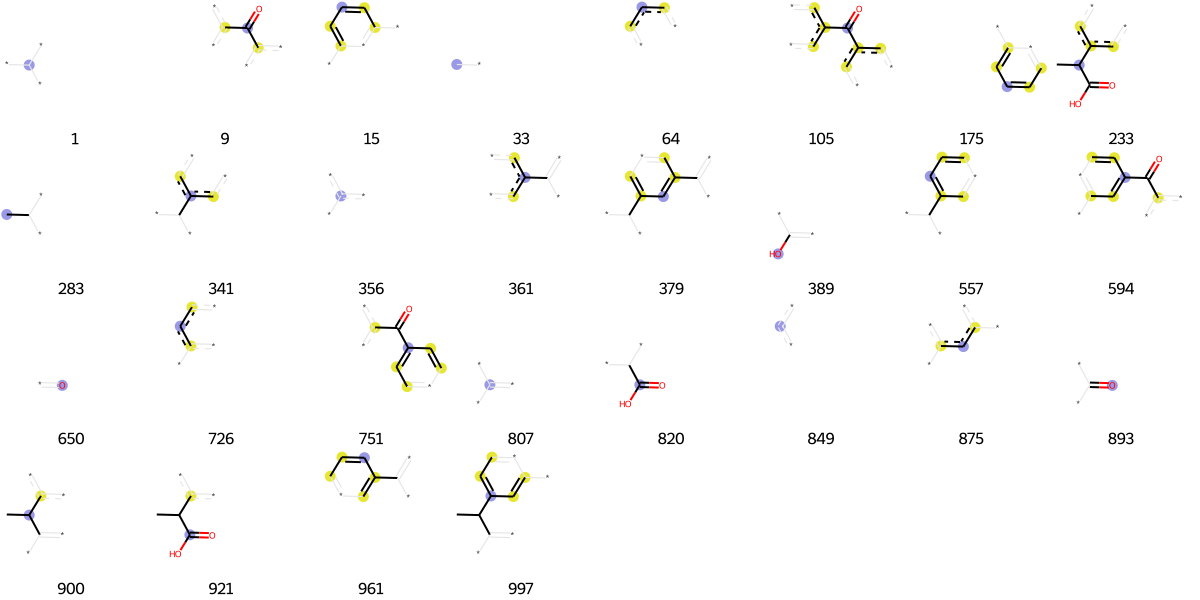

In [6107]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [6108]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[15,
 33,
 49,
 64,
 80,
 85,
 136,
 175,
 271,
 294,
 322,
 323,
 352,
 356,
 378,
 389,
 416,
 428,
 471,
 477,
 562,
 623,
 624,
 629,
 650,
 668,
 684,
 695,
 713,
 723,
 726,
 736,
 753,
 774,
 775,
 791,
 807,
 828,
 849,
 863,
 875,
 893,
 901,
 912,
 932,
 935,
 980,
 984]

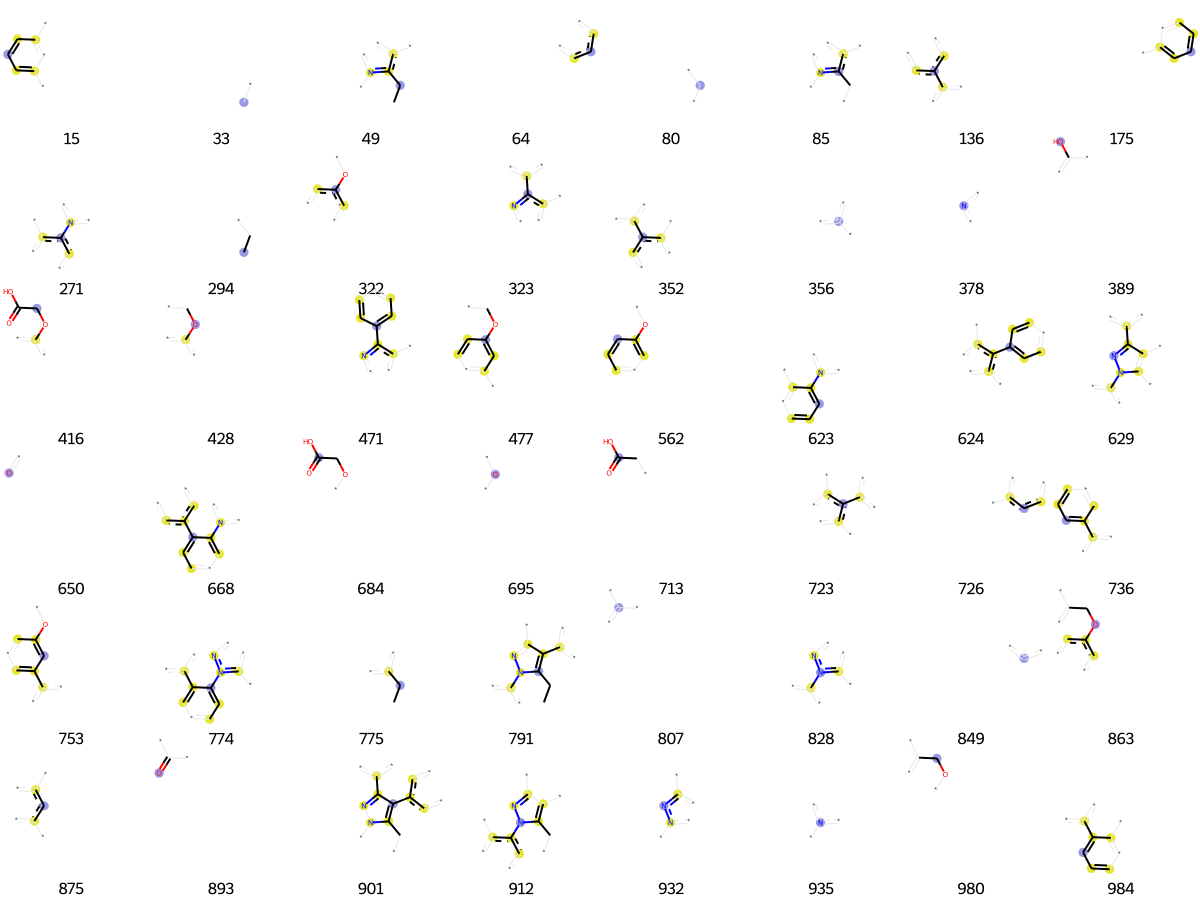

In [6109]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [6110]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[64,
 136,
 147,
 175,
 222,
 293,
 352,
 356,
 378,
 389,
 428,
 433,
 435,
 489,
 495,
 510,
 511,
 528,
 543,
 548,
 552,
 675,
 726,
 736,
 770,
 786,
 849,
 960,
 1015]

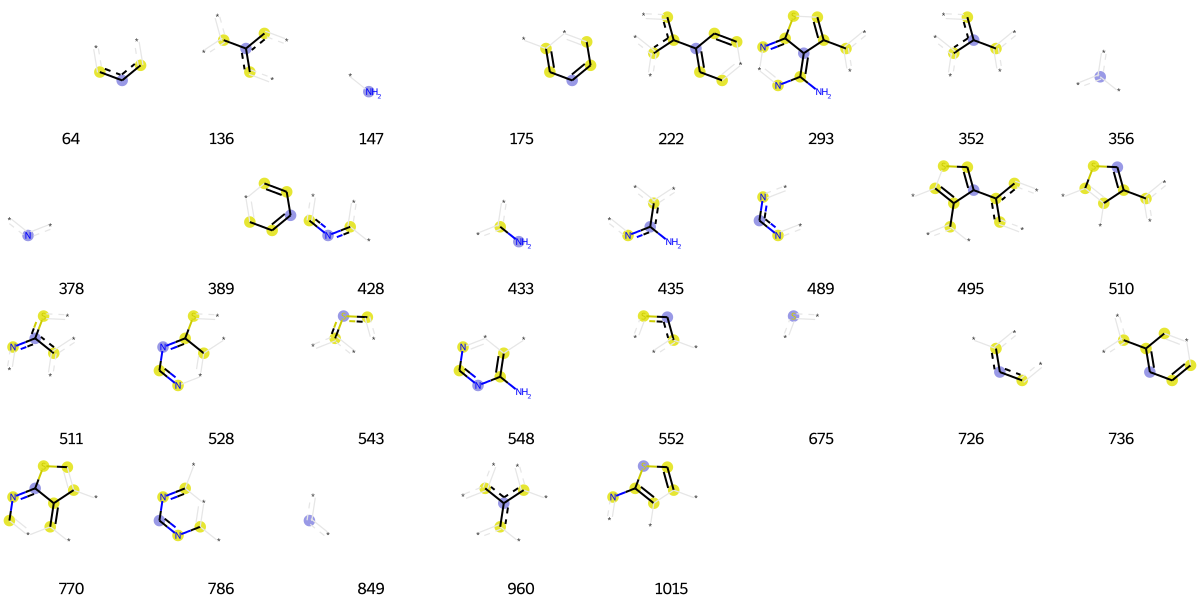

In [6111]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [6112]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[33,
 41,
 62,
 80,
 92,
 98,
 106,
 116,
 117,
 128,
 136,
 169,
 190,
 240,
 242,
 294,
 318,
 322,
 341,
 356,
 378,
 385,
 431,
 441,
 482,
 512,
 543,
 552,
 578,
 642,
 650,
 675,
 695,
 698,
 702,
 718,
 726,
 735,
 775,
 781,
 792,
 807,
 831,
 841,
 849,
 862,
 893,
 896,
 935,
 947,
 978,
 980,
 992,
 1010]

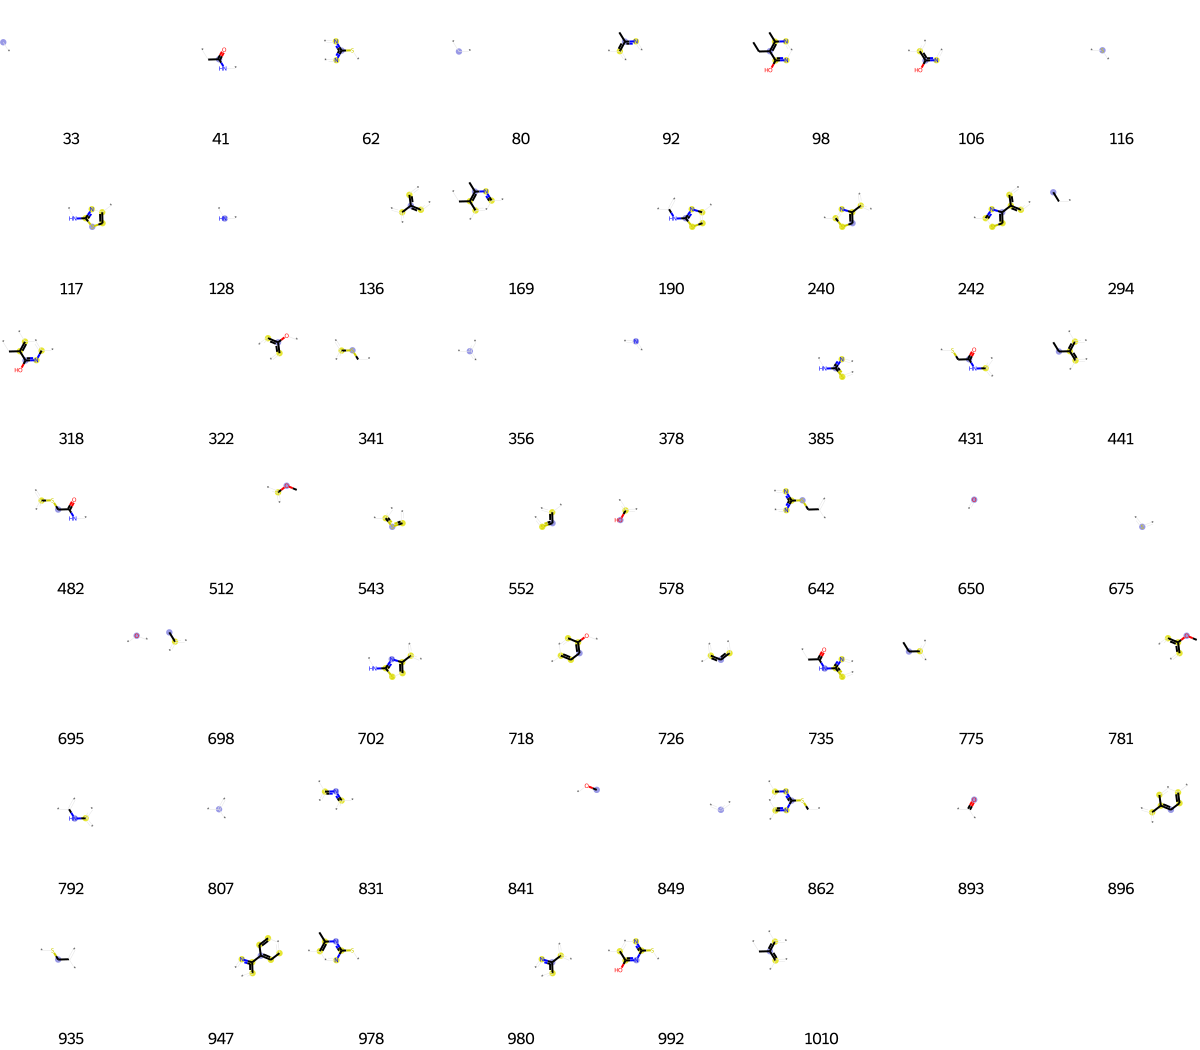

In [6113]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [6114]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[2,
 4,
 36,
 93,
 96,
 102,
 135,
 140,
 268,
 281,
 310,
 356,
 378,
 421,
 422,
 456,
 472,
 556,
 578,
 628,
 675,
 679,
 714,
 926,
 935,
 952,
 974,
 986,
 987,
 1019]

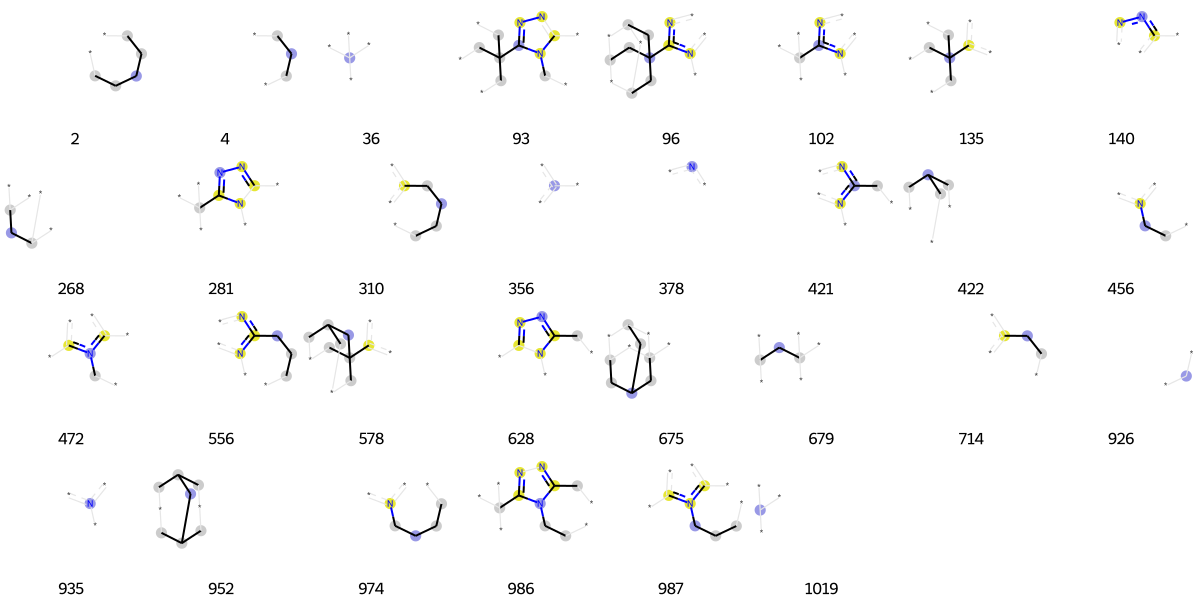

In [6115]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [6116]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[33,
 235,
 250,
 264,
 266,
 271,
 281,
 314,
 333,
 356,
 367,
 386,
 404,
 463,
 495,
 504,
 599,
 646,
 650,
 667,
 675,
 698,
 699,
 709,
 726,
 799,
 809,
 849,
 850,
 875,
 885,
 904,
 911,
 935,
 1013]

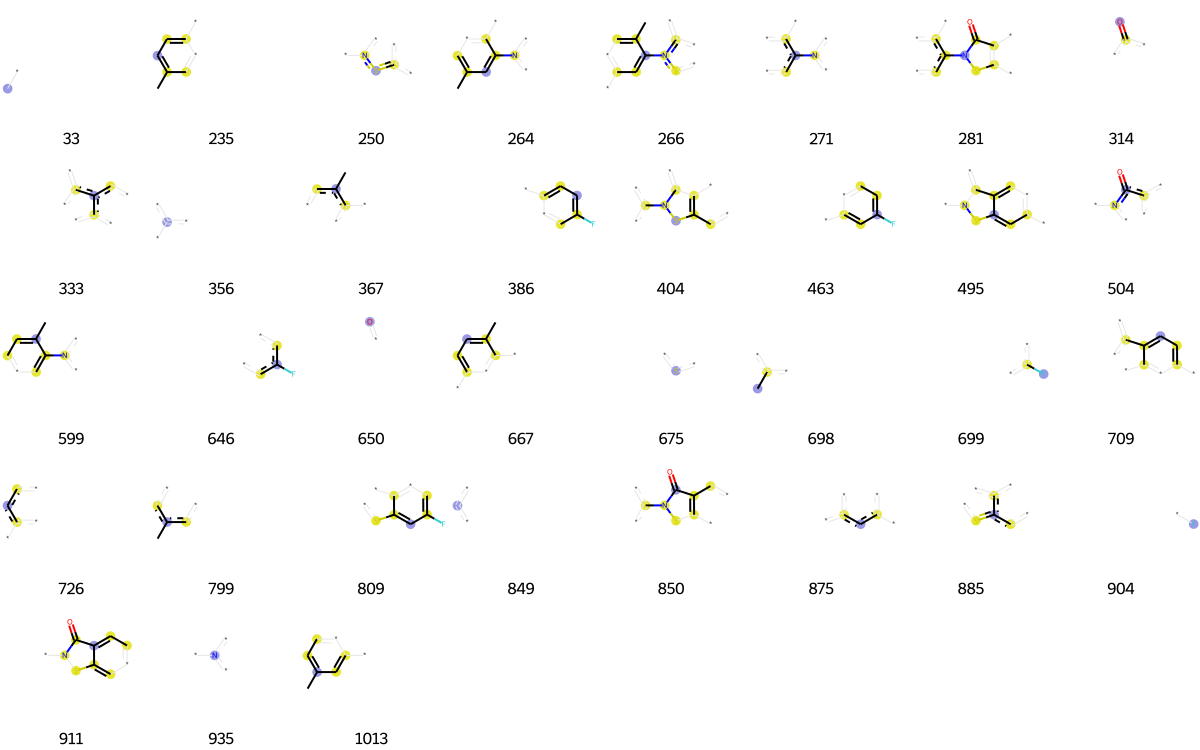

In [6117]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [6118]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[11,
 33,
 268,
 319,
 322,
 350,
 356,
 366,
 374,
 441,
 452,
 456,
 505,
 512,
 585,
 623,
 650,
 656,
 695,
 705,
 715,
 718,
 726,
 738,
 757,
 781,
 800,
 831,
 836,
 841,
 849,
 875,
 881,
 926,
 935,
 950,
 1023]

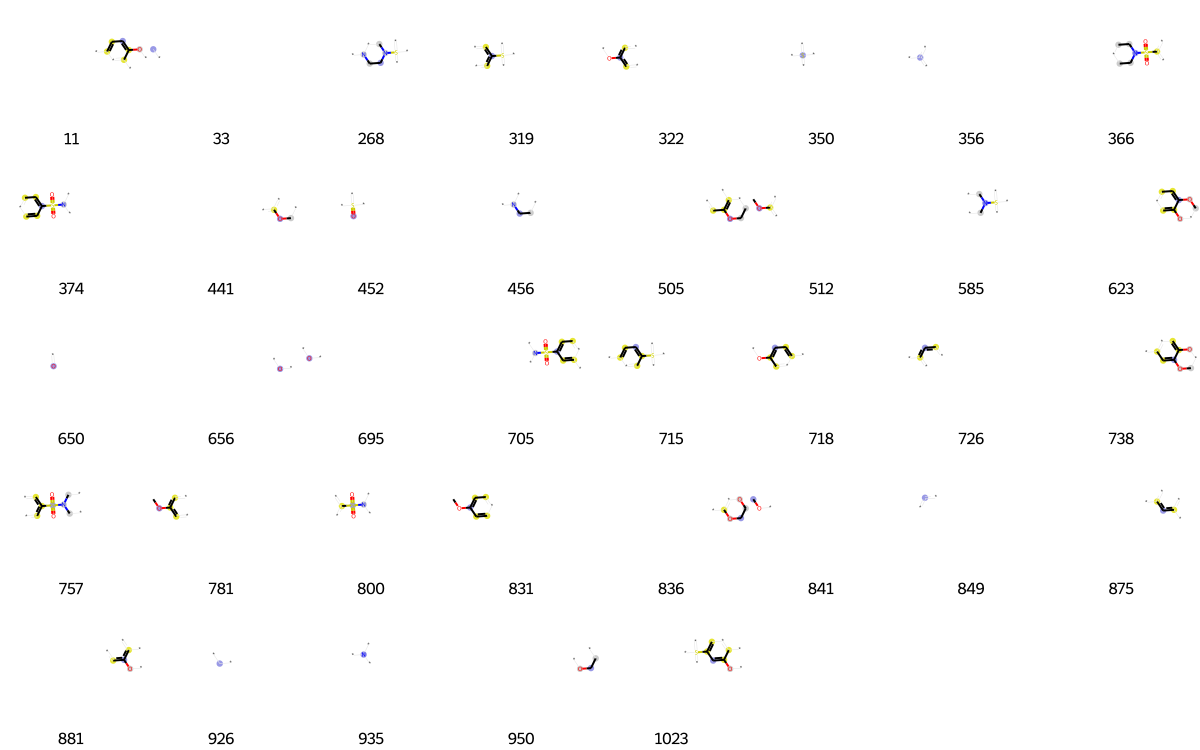

In [6119]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [6120]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[33,
 36,
 38,
 57,
 133,
 147,
 233,
 250,
 283,
 310,
 342,
 356,
 378,
 433,
 521,
 607,
 625,
 726,
 728,
 759,
 801,
 815,
 847,
 849,
 868,
 880,
 909,
 927,
 935,
 1002]

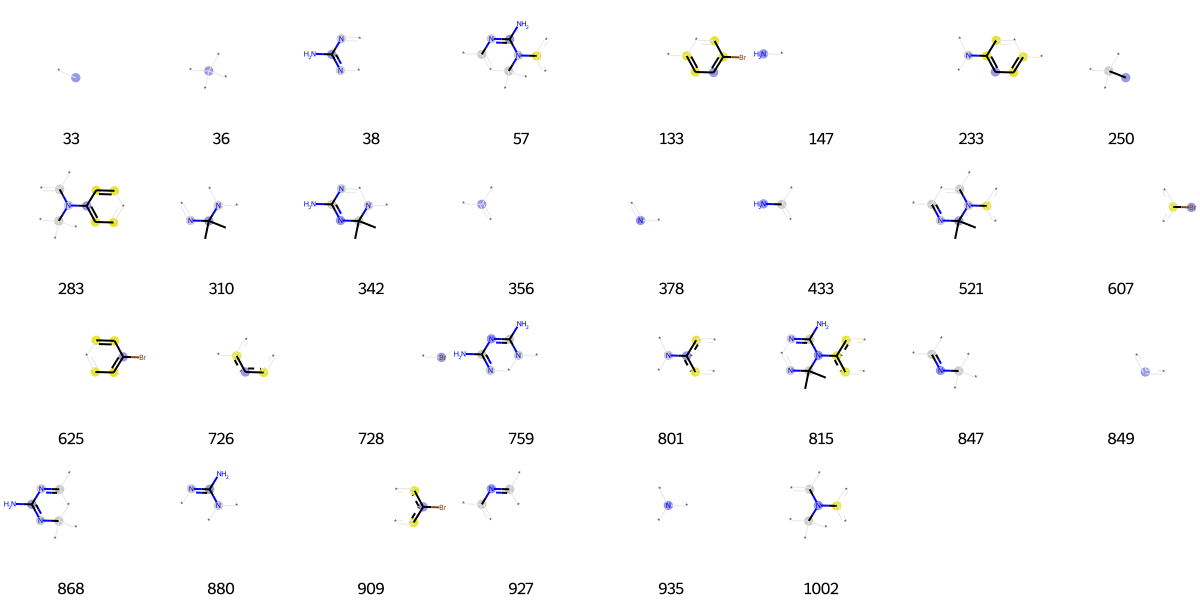

In [6121]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [6122]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[61,
 63,
 64,
 73,
 90,
 151,
 175,
 203,
 263,
 284,
 289,
 305,
 356,
 378,
 407,
 456,
 492,
 527,
 635,
 726,
 804,
 831,
 849,
 876,
 926,
 927,
 935,
 996]

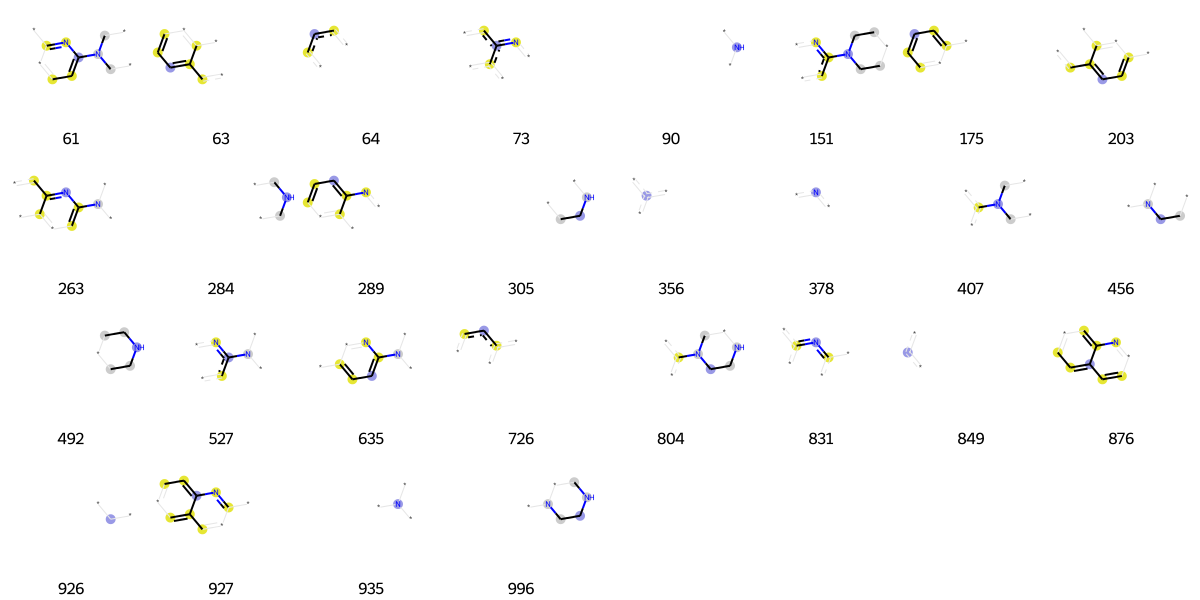

In [6123]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [6124]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[3,
 42,
 64,
 80,
 128,
 168,
 172,
 175,
 200,
 271,
 314,
 323,
 342,
 352,
 356,
 369,
 402,
 479,
 578,
 583,
 588,
 621,
 623,
 647,
 650,
 672,
 694,
 725,
 726,
 755,
 776,
 796,
 807,
 849,
 871,
 879,
 935,
 940,
 958,
 967,
 984]

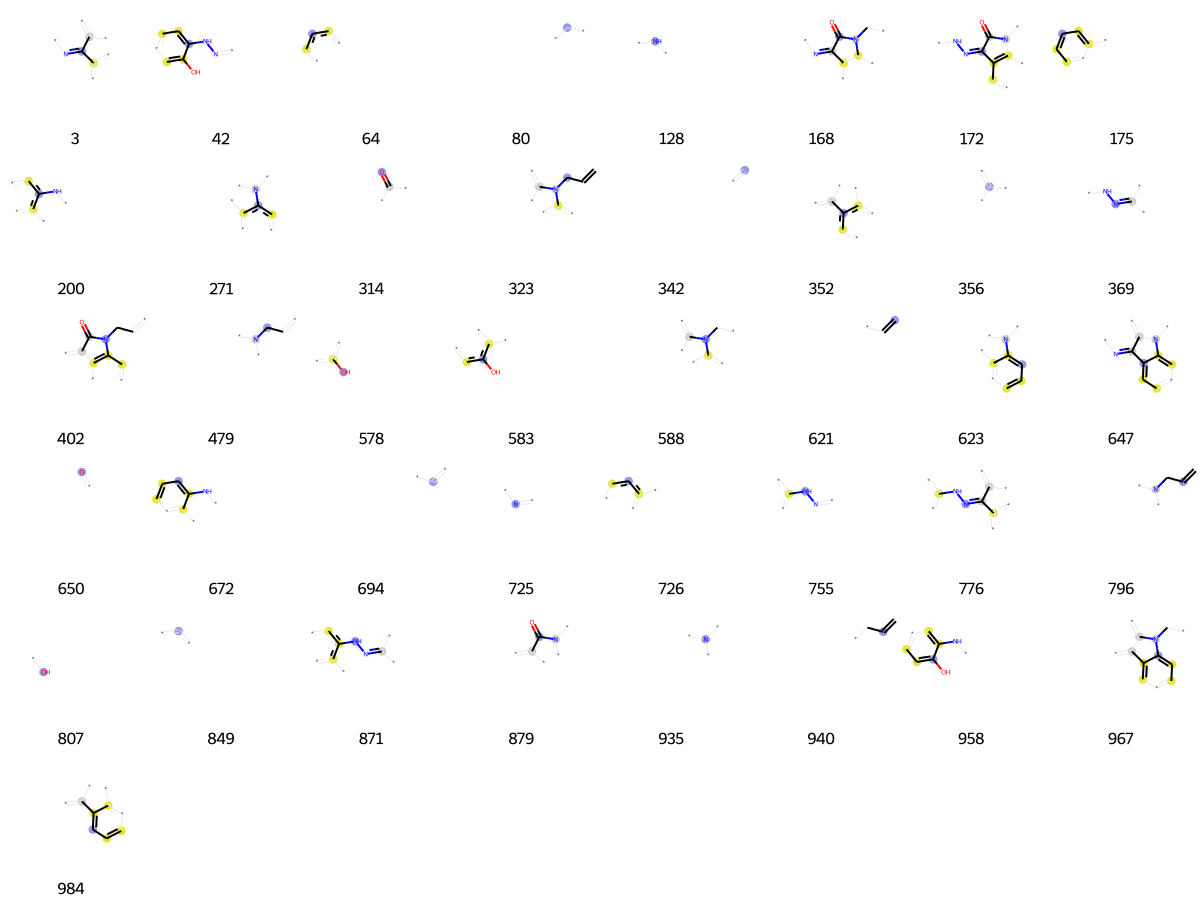

In [6125]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [6126]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[64,
 104,
 121,
 136,
 171,
 175,
 250,
 314,
 333,
 356,
 365,
 368,
 472,
 549,
 580,
 630,
 650,
 656,
 666,
 715,
 726,
 753,
 769,
 779,
 784,
 785,
 790,
 838,
 849,
 865,
 875,
 896,
 920,
 939]

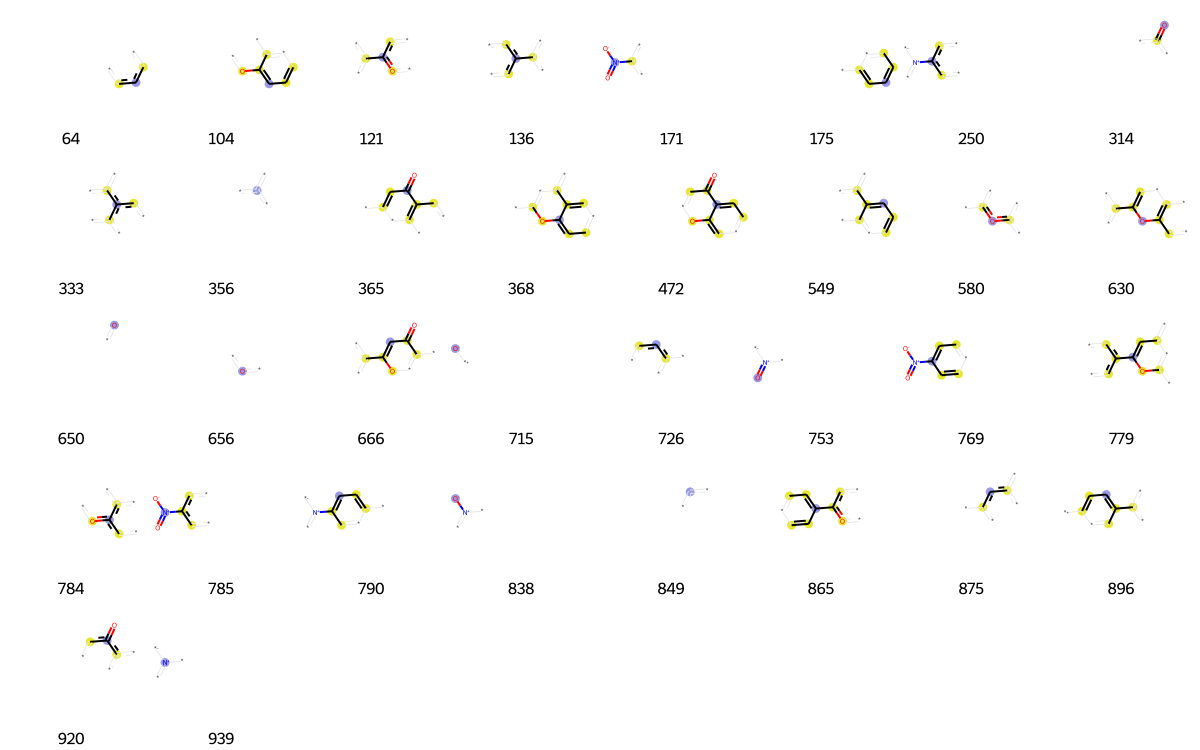

In [6127]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [6128]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[15,
 19,
 27,
 33,
 41,
 64,
 80,
 92,
 116,
 128,
 137,
 160,
 169,
 184,
 191,
 211,
 219,
 247,
 333,
 356,
 358,
 360,
 378,
 384,
 394,
 412,
 428,
 448,
 489,
 540,
 549,
 600,
 650,
 672,
 697,
 698,
 699,
 703,
 711,
 721,
 726,
 742,
 792,
 807,
 811,
 831,
 842,
 849,
 855,
 874,
 875,
 893,
 901,
 932,
 934,
 935,
 1010]

In [6129]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[4,
 33,
 36,
 42,
 64,
 80,
 107,
 108,
 109,
 128,
 138,
 139,
 175,
 197,
 207,
 249,
 265,
 333,
 356,
 361,
 389,
 428,
 486,
 512,
 539,
 547,
 584,
 603,
 614,
 650,
 695,
 703,
 726,
 730,
 745,
 807,
 841,
 849,
 868,
 875,
 881,
 893,
 902,
 915,
 926,
 946,
 1018]

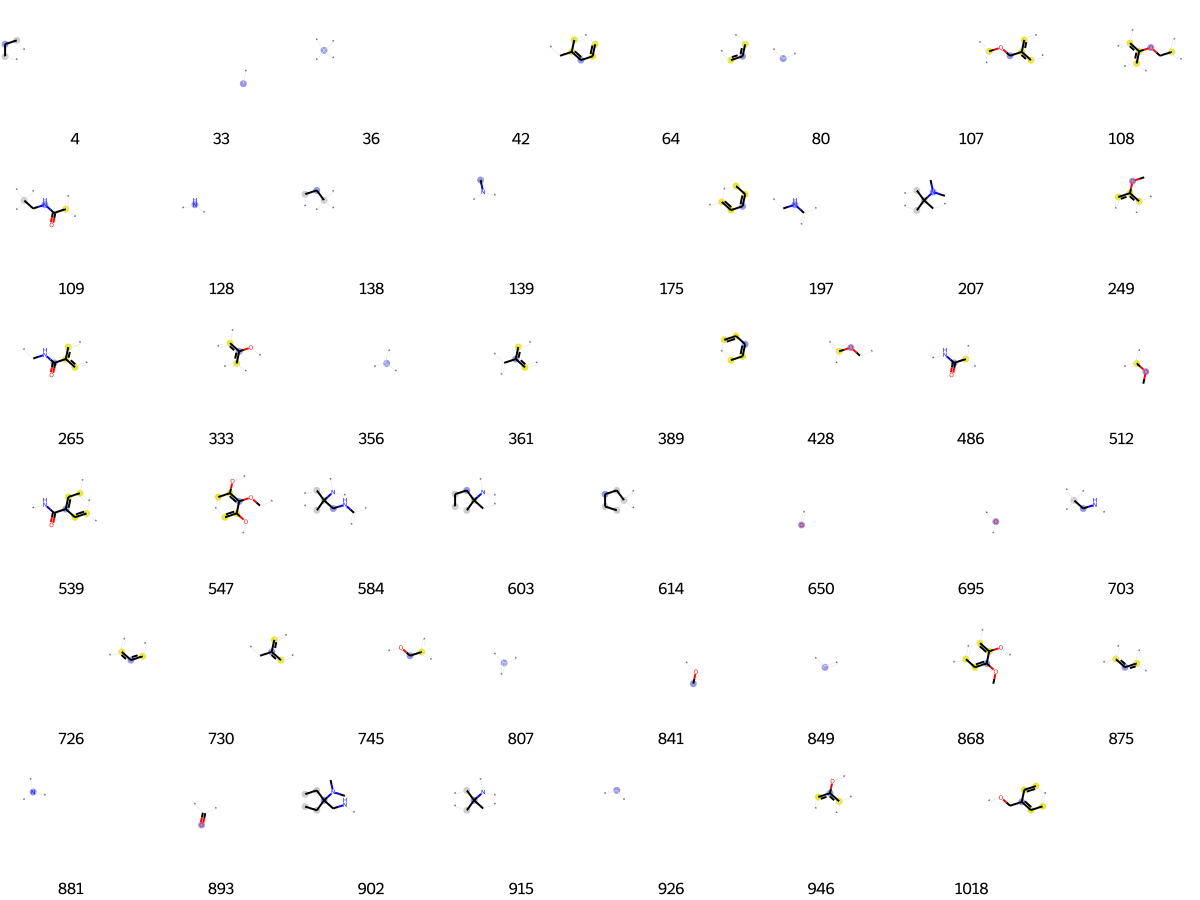

In [6130]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [6131]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[20,
 33,
 36,
 57,
 63,
 67,
 68,
 84,
 109,
 119,
 130,
 138,
 144,
 169,
 214,
 233,
 245,
 250,
 268,
 285,
 301,
 313,
 314,
 324,
 336,
 356,
 357,
 407,
 412,
 426,
 441,
 449,
 453,
 463,
 485,
 493,
 519,
 528,
 529,
 550,
 555,
 562,
 589,
 609,
 650,
 656,
 682,
 687,
 695,
 699,
 722,
 739,
 754,
 776,
 805,
 807,
 811,
 849,
 897,
 926,
 927,
 956,
 964,
 1008,
 1019]

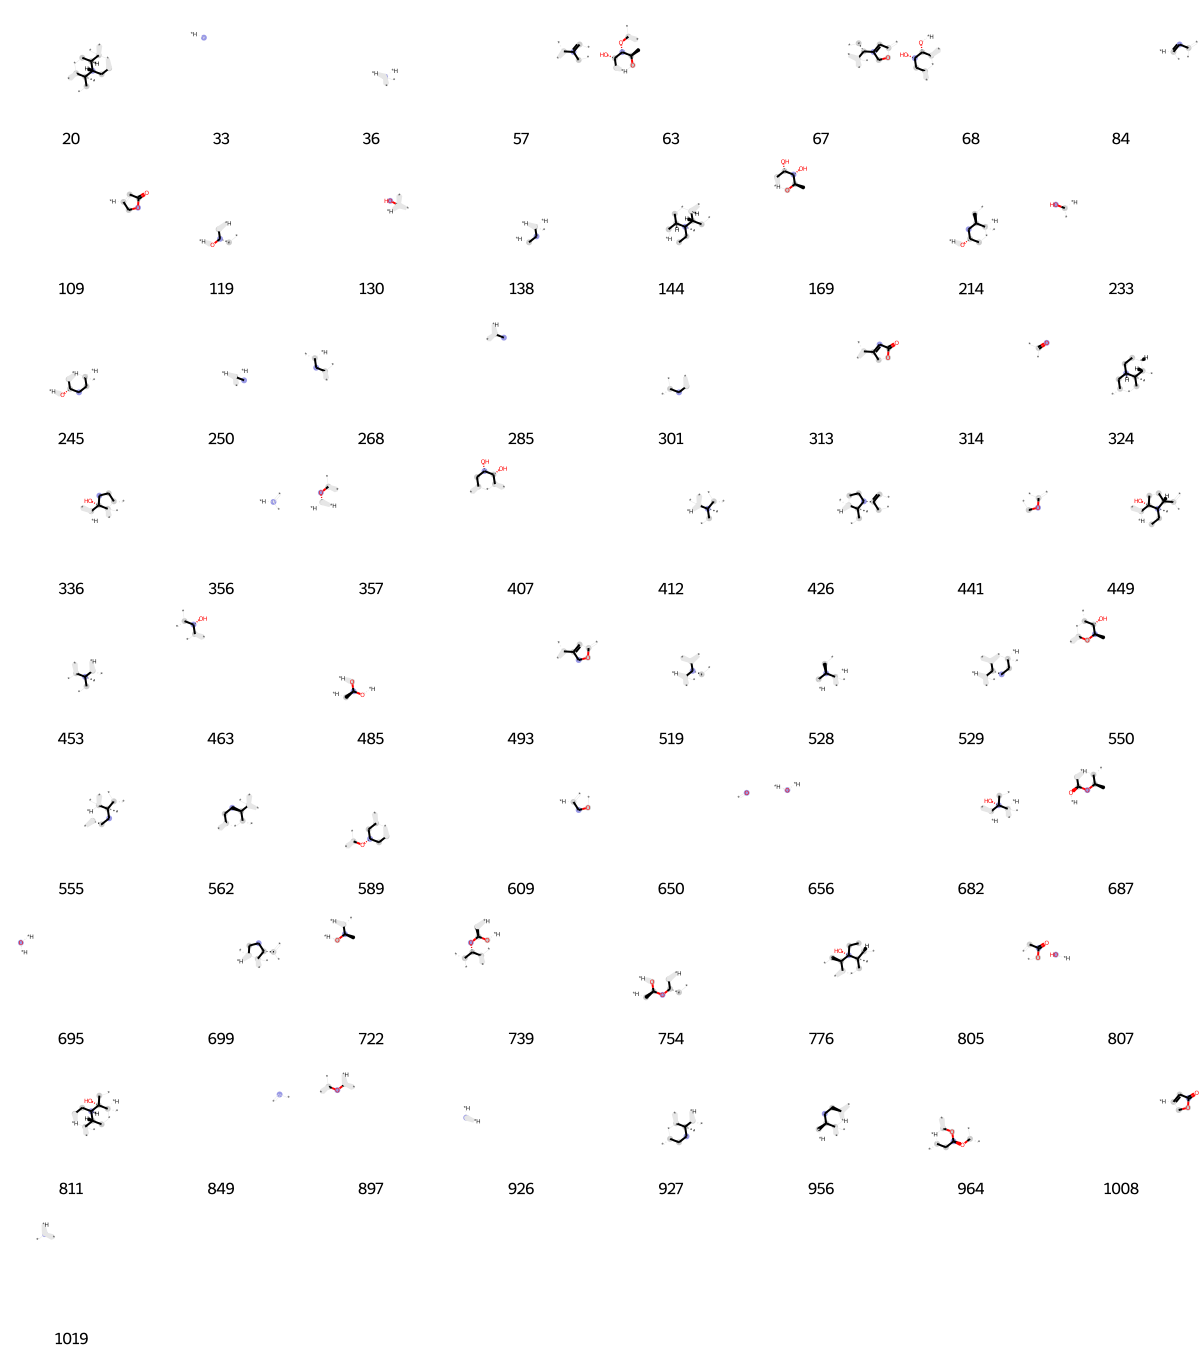

In [6132]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [6133]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[125,
 128,
 165,
 171,
 187,
 200,
 216,
 250,
 272,
 352,
 356,
 366,
 451,
 486,
 493,
 561,
 578,
 583,
 650,
 659,
 715,
 726,
 753,
 785,
 790,
 792,
 807,
 816,
 832,
 838,
 847,
 849,
 875,
 888,
 893,
 916,
 939,
 947,
 967]

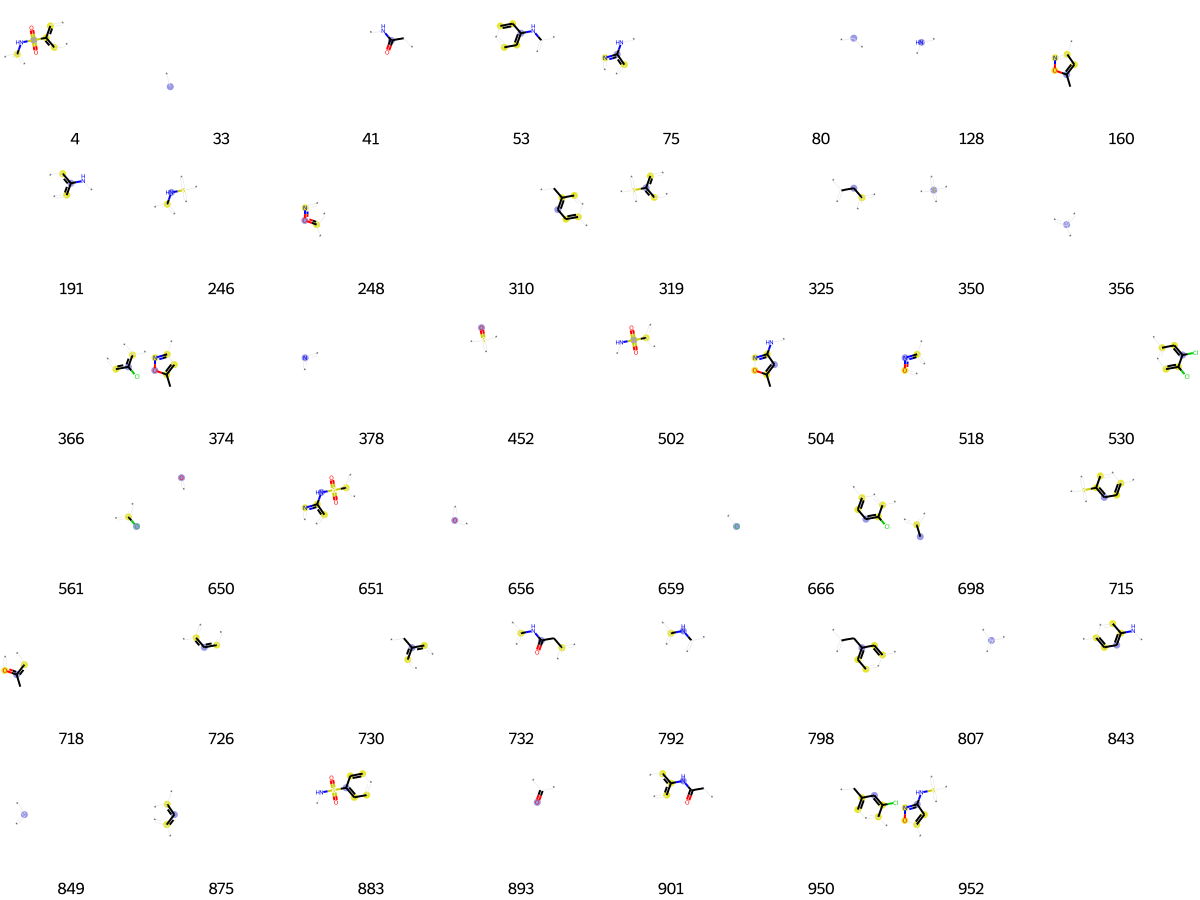

In [6134]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [6135]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 80,
 114,
 128,
 134,
 136,
 162,
 222,
 318,
 343,
 350,
 356,
 371,
 375,
 429,
 452,
 476,
 482,
 497,
 502,
 503,
 527,
 537,
 561,
 576,
 650,
 659,
 675,
 726,
 807,
 848,
 849,
 850,
 898,
 904,
 908,
 917]

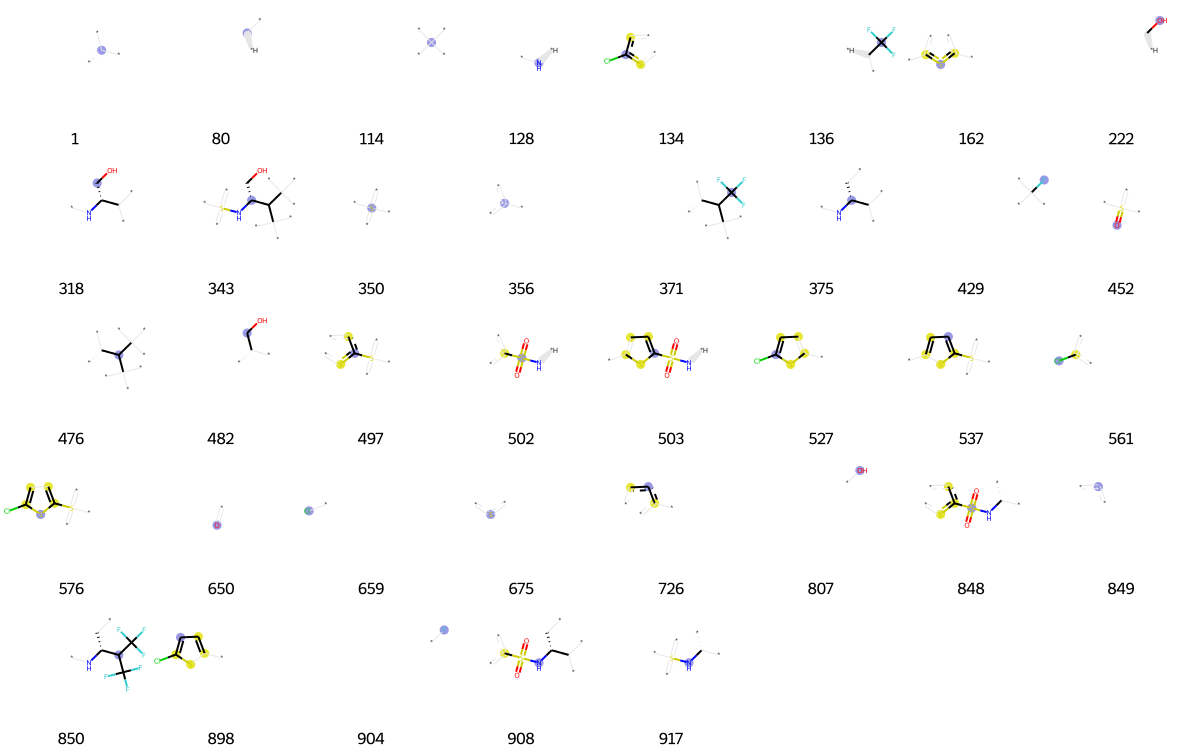

In [6136]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [6137]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[33,
 80,
 111,
 121,
 144,
 147,
 219,
 356,
 378,
 407,
 428,
 464,
 488,
 724,
 803,
 816,
 849,
 854,
 894,
 932,
 935,
 950,
 981]

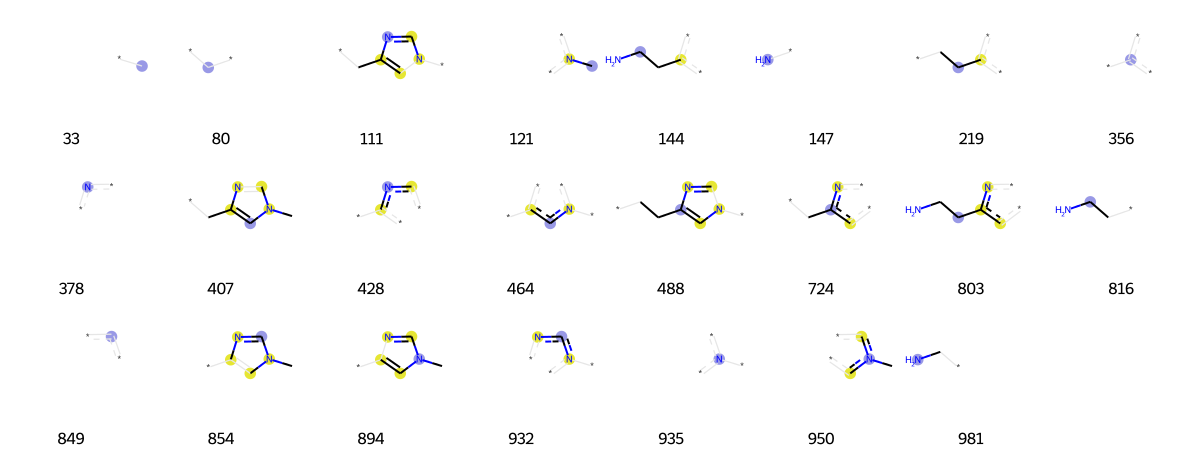

In [6138]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [6139]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[16,
 33,
 46,
 62,
 64,
 77,
 83,
 90,
 119,
 128,
 145,
 171,
 175,
 268,
 275,
 285,
 288,
 333,
 356,
 361,
 383,
 410,
 455,
 456,
 549,
 622,
 650,
 656,
 686,
 695,
 706,
 714,
 721,
 722,
 726,
 739,
 740,
 759,
 791,
 807,
 829,
 830,
 841,
 848,
 849,
 893,
 906,
 920,
 922,
 926,
 935,
 954,
 956,
 978,
 1019]

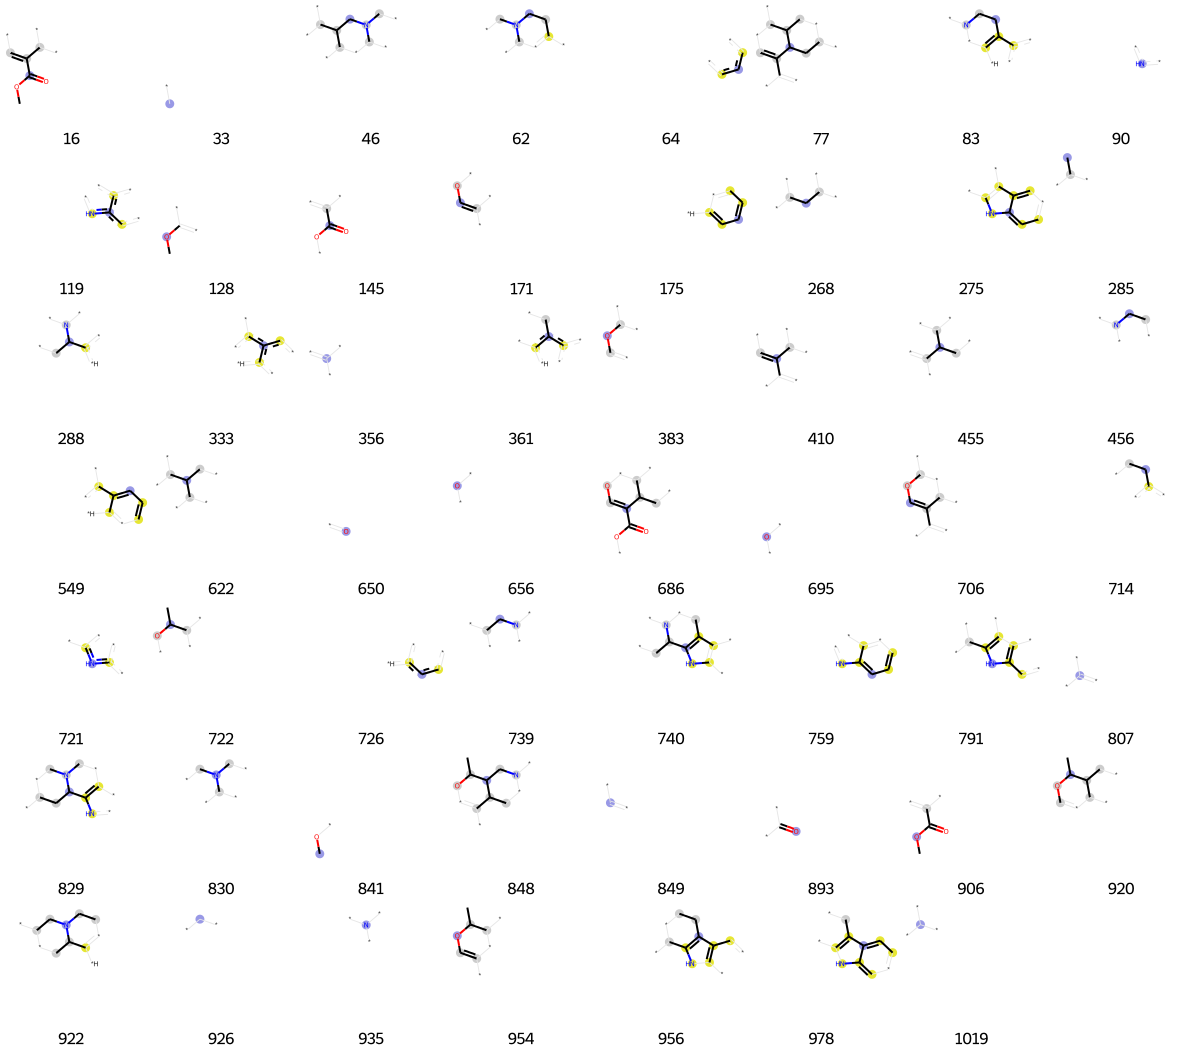

In [6140]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [6141]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[2,
 4,
 15,
 64,
 128,
 171,
 175,
 200,
 231,
 250,
 271,
 356,
 361,
 407,
 433,
 456,
 482,
 486,
 526,
 586,
 623,
 650,
 672,
 680,
 715,
 726,
 753,
 754,
 771,
 785,
 792,
 807,
 838,
 849,
 875,
 893,
 916,
 926,
 935,
 939,
 947,
 961,
 974]

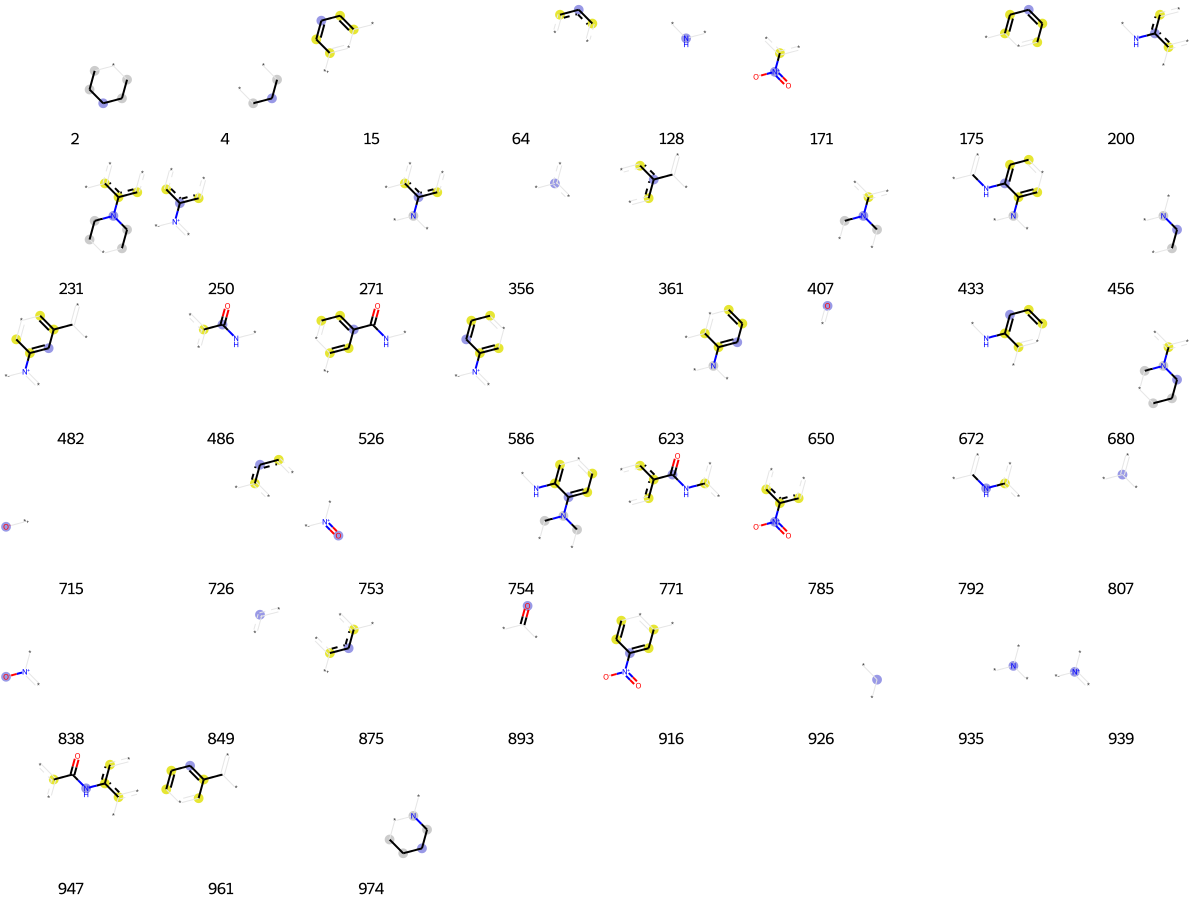

In [6142]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [6143]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[29,
 33,
 43,
 64,
 80,
 85,
 96,
 105,
 130,
 149,
 158,
 175,
 209,
 231,
 235,
 271,
 310,
 333,
 356,
 367,
 378,
 407,
 428,
 448,
 456,
 457,
 484,
 489,
 511,
 599,
 623,
 659,
 665,
 672,
 698,
 726,
 730,
 741,
 786,
 799,
 803,
 804,
 849,
 896,
 926,
 935,
 975]

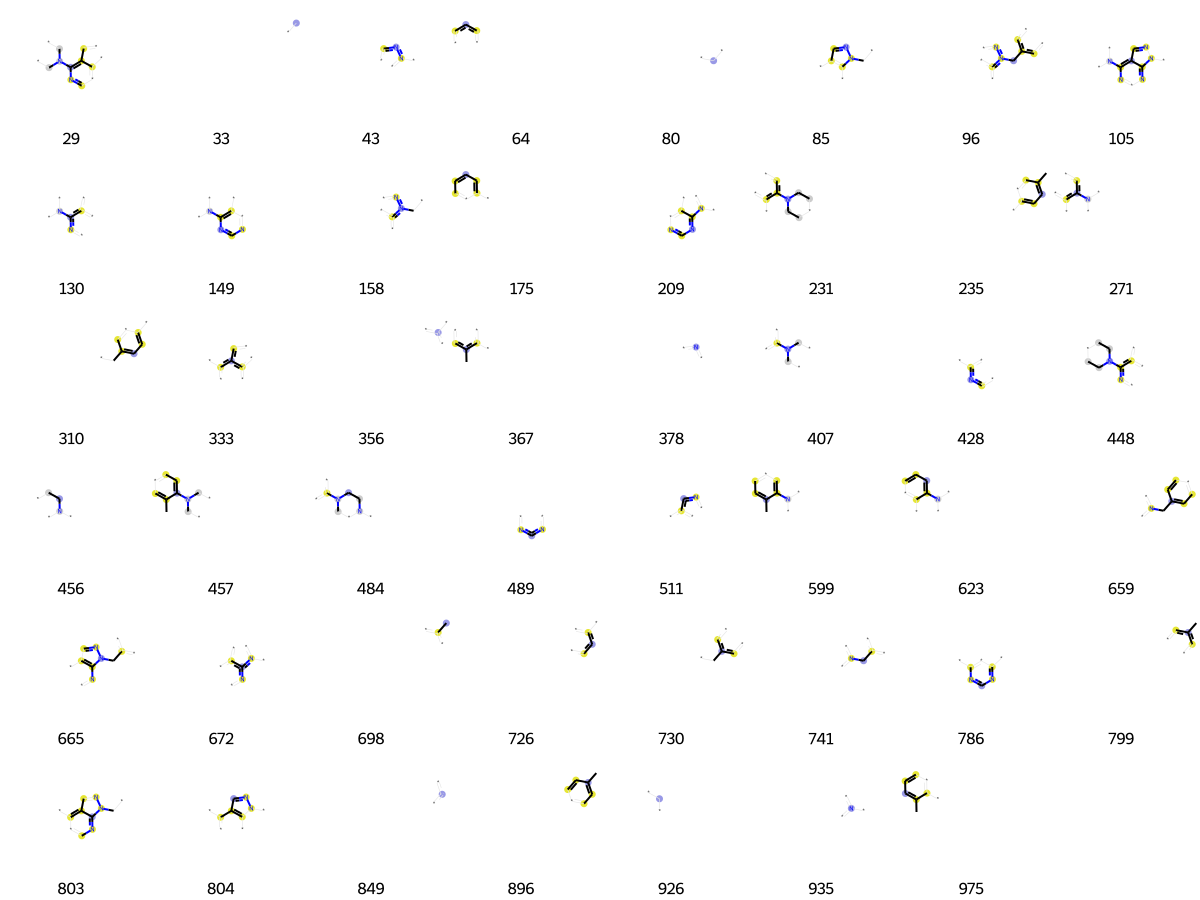

In [6144]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [6145]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[23,
 25,
 35,
 64,
 128,
 175,
 200,
 270,
 309,
 356,
 389,
 423,
 431,
 456,
 650,
 672,
 682,
 694,
 725,
 726,
 755,
 807,
 843,
 849,
 864,
 882,
 893,
 967,
 1009]

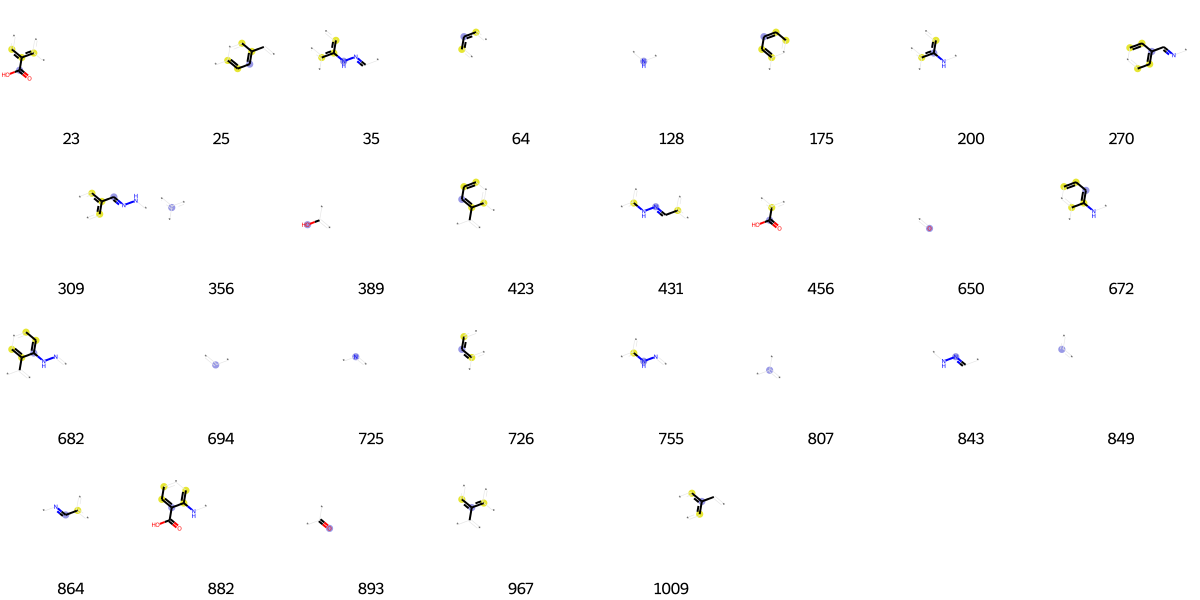

In [6146]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [6147]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[33,
 41,
 42,
 64,
 80,
 86,
 121,
 128,
 136,
 140,
 175,
 206,
 236,
 265,
 294,
 318,
 325,
 356,
 378,
 389,
 398,
 558,
 650,
 726,
 730,
 732,
 759,
 792,
 794,
 807,
 820,
 849,
 893,
 913,
 932,
 933,
 935]

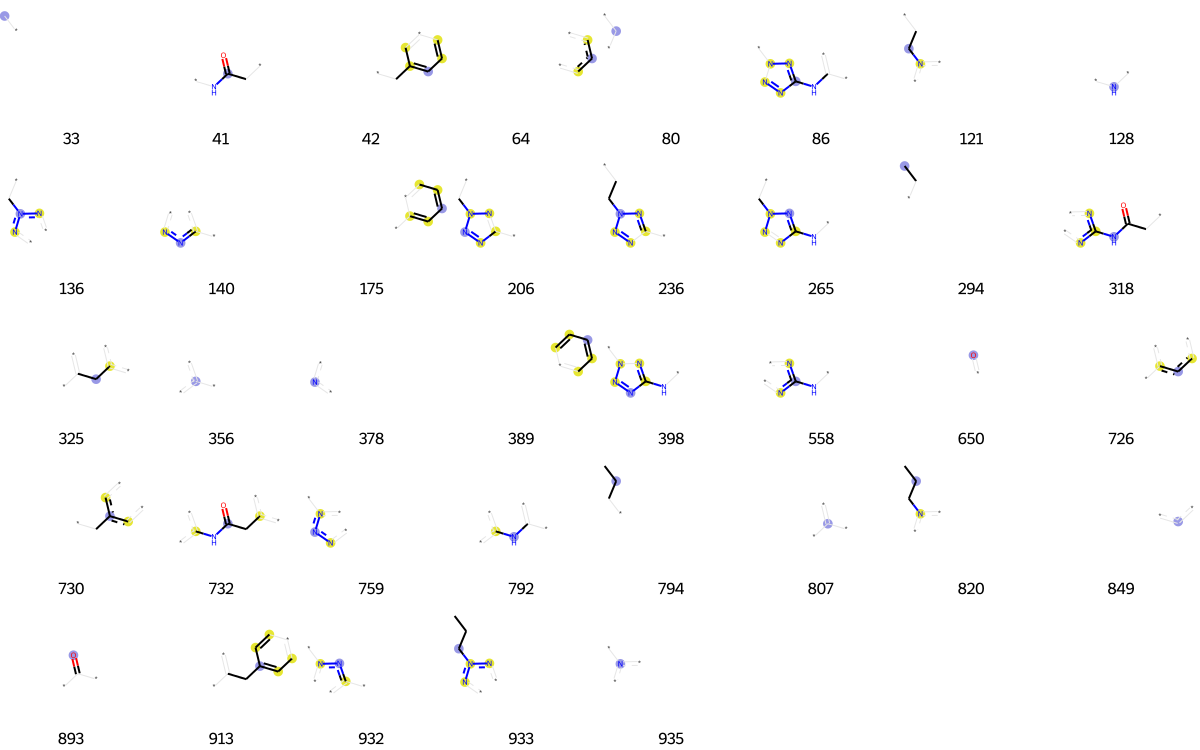

In [6148]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [6149]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[27,
 41,
 42,
 53,
 64,
 80,
 102,
 107,
 128,
 147,
 175,
 181,
 191,
 322,
 356,
 389,
 428,
 650,
 654,
 695,
 718,
 726,
 730,
 745,
 792,
 807,
 843,
 849,
 893,
 901,
 981,
 1018]

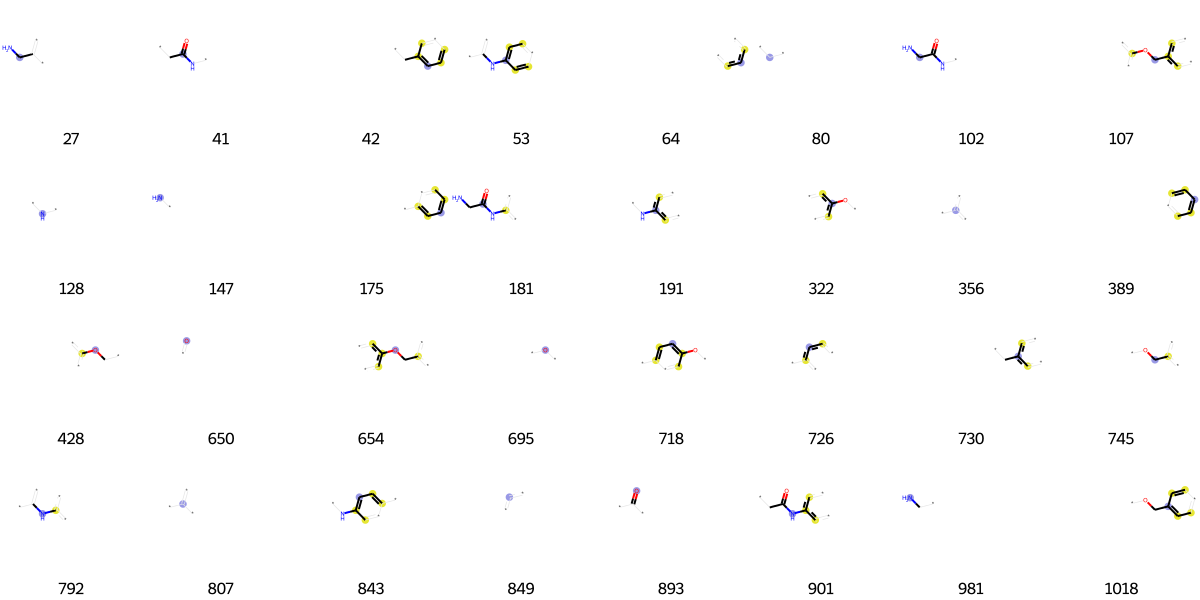

In [6150]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [6151]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[15,
 25,
 33,
 36,
 41,
 53,
 54,
 64,
 74,
 77,
 80,
 81,
 90,
 95,
 105,
 114,
 128,
 191,
 225,
 235,
 260,
 261,
 281,
 288,
 310,
 314,
 338,
 356,
 361,
 389,
 456,
 477,
 489,
 564,
 588,
 591,
 611,
 650,
 694,
 698,
 726,
 771,
 786,
 792,
 797,
 799,
 801,
 807,
 837,
 843,
 849,
 875,
 879,
 893,
 896,
 901,
 935,
 961]

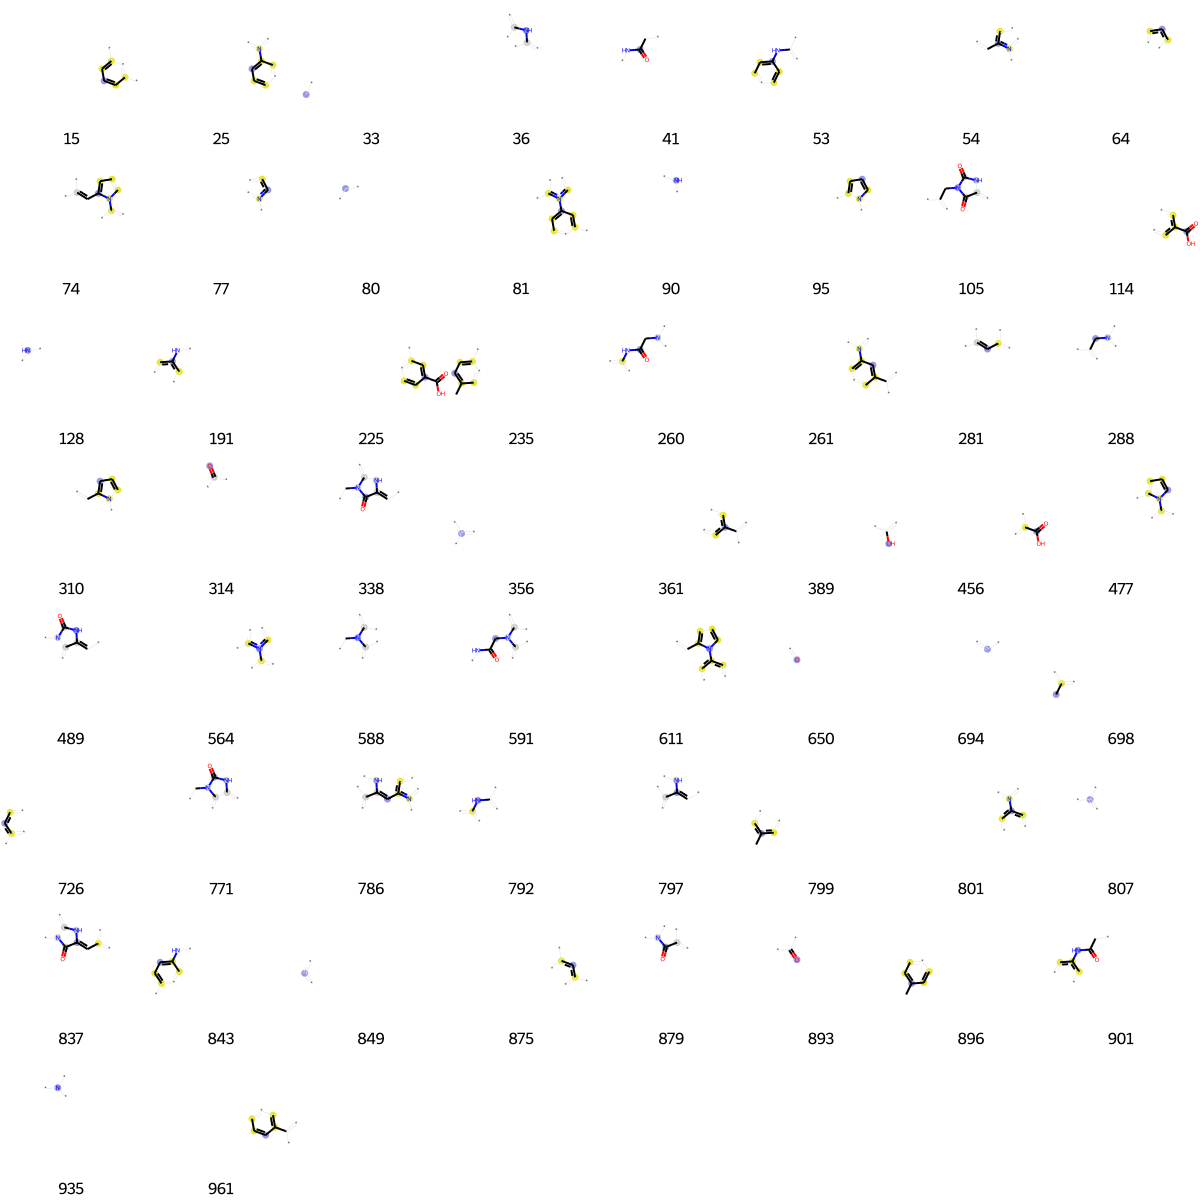

In [6152]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [6153]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[23,
 73,
 118,
 133,
 136,
 165,
 216,
 230,
 333,
 356,
 368,
 378,
 389,
 456,
 561,
 607,
 625,
 650,
 659,
 726,
 728,
 799,
 807,
 816,
 831,
 849,
 875,
 893,
 896,
 909,
 916,
 947,
 961,
 967,
 980]

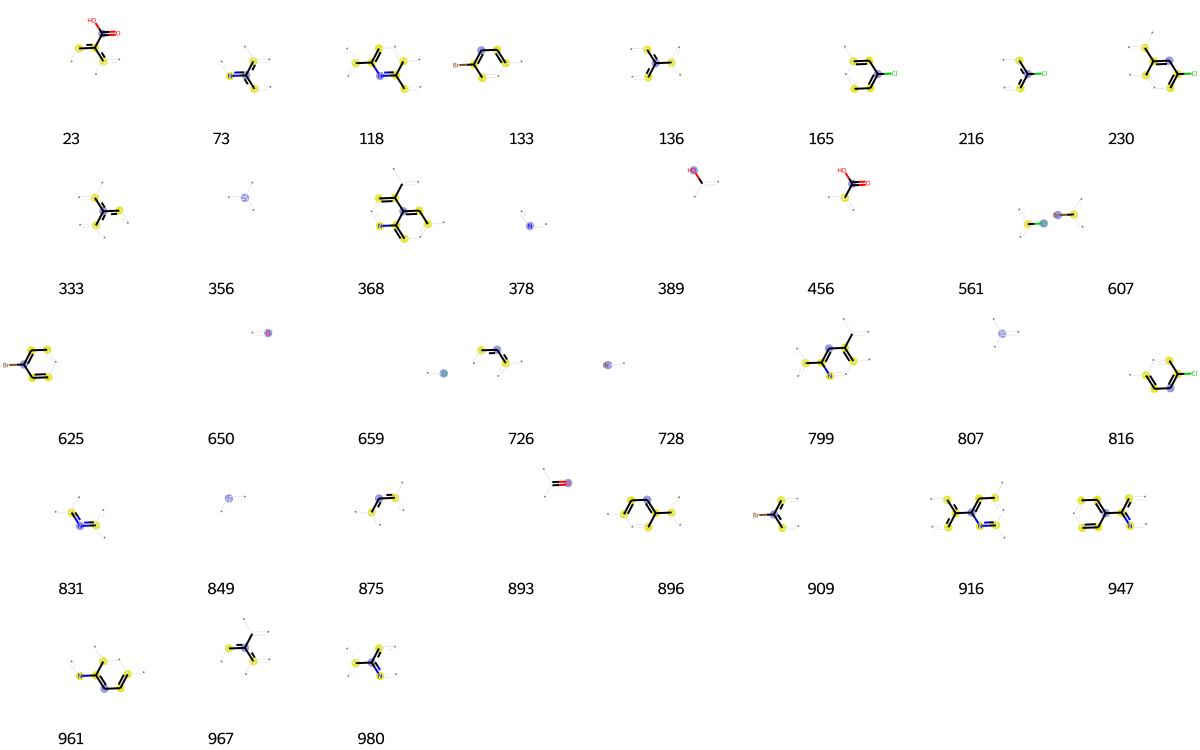

In [6154]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [6155]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[80,
 128,
 147,
 289,
 356,
 361,
 486,
 578,
 641,
 650,
 673,
 677,
 726,
 745,
 754,
 770,
 807,
 849,
 893,
 963]

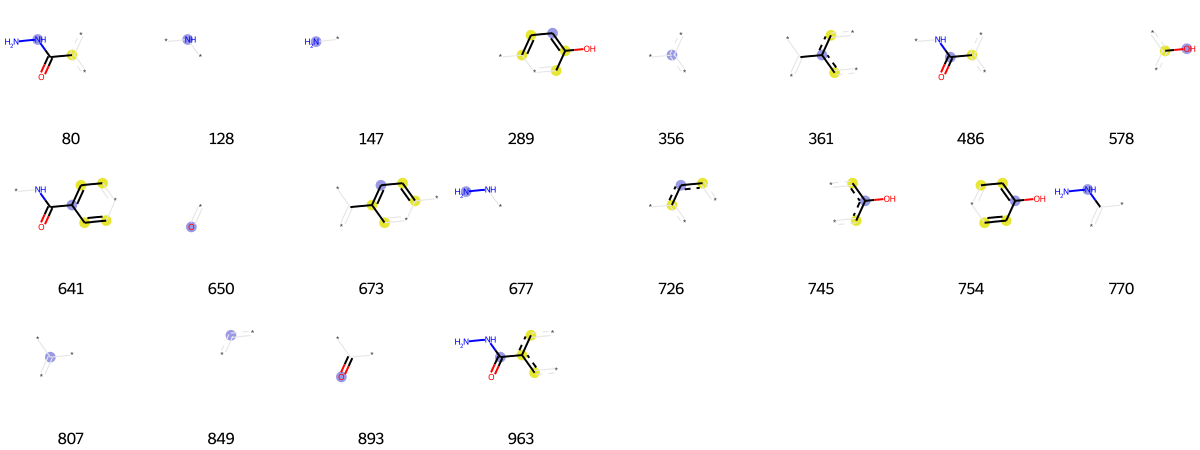

In [6156]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])